#Cours de Machine Learning (Lettres), Semestre d'Automne 2024 - Rendu 2

##Professeur : Guillaume Guex
##Auteur : Joseph Grob

##Informations générales sur le code et le fichier.txt utilisés:

- Le code a été exécuté avec CPU comme type d'exécution.

- Toutes les bibliothèques utilisées proviennent du cours et des TPs. L'essentiel du code provient du cours et des TPs. Aussi, le modèle pré-entrainé pour l'analyse des sentiments (avec IMBD) "bert-base-uncased" est le même que celui utilisé lors du TP 12 et nous l'avons récupéré du Google drive du professeur au lien suivant qui se trouve sur Moodle : https://drive.google.com/drive/folders/1qk69hJr7GBg4KHN6mikRTrKDjc5RuQI3.

- Les analyses des résultats et les commentaires proviennnent du contenu du cours et de ma propre réflexion sur le sujet.

- Tout le travail a été réalisé sur le fichier.txt du livre (au complet) "Alice in Wonderland" de Lewis Carroll (1865) que j'ai trouvé sur le site www.gutenberg.org via l'URL suivant : https://www.gutenberg.org/ebooks/11. Soulignons que certains paratextes, comme ces éléments : La page de garde, la page de titre, le colophon, la préface, la table des matières, ainsi que les notes, les indexs et les glossaires ont été supprimés manuellement du fichier.txt avant le lancement du code. Avant le lancement du code, nous avons donc un texte avec uniquement les chapitres et le texte principal.

##Source:

- Carroll, Lewis. Alice's Adventures in Wonderland. Project Gutenberg, eBook No. 11, publié pour la première fois le 27 juin 2008, mise à jour le 10 novembre 2024. Disponible en ligne : https://www.gutenberg.org/ebooks/11.


# Partie 1 : Pré-traitements et statistiques

##1.1

In [ ]:
# Module pour gérer les opérations système, comme la gestion des fichiers et des dossiers
import os
# Module pour travailler avec les expressions régulières (regex), utile pour le traitement de texte
import re

# Lire le fichier complet
with open("ALICE_WONDERLAND.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Regex pour détecter les chapitres
chapter_regex = r"(CHAPTER\s+[IVXLCDM]+\.)"

# Séparer par chapitres
chapters = re.split(chapter_regex, text)

# Regrouper le titre "CHAPTER ..." avec son contenu
chapters = [chapters[i] + chapters[i + 1] for i in range(1, len(chapters) - 1, 2)]

# Supprimer les lignes inutiles ou séparatrices dans chaque chapitre
cleaned_chapters = []
for chapter in chapters:
    lines = chapter.splitlines()
    cleaned_lines = [
        line for line in lines if not re.match(chapter_regex, line.strip())
    ]
    cleaned_chapters.append("\n".join(cleaned_lines))

# Créer un dossier pour sauvegarder les chapitres
output_dir = "chapters_corrected"
os.makedirs(output_dir, exist_ok=True)

# Sauvegarder chaque chapitre dans un fichier séparé
for i, chapter in enumerate(cleaned_chapters, start=1):
    with open(f"{output_dir}/chapter_{i:02d}.txt", "w", encoding="utf-8") as file:
        file.write(chapter.strip())

# Afficher un récapitulatif
print(f"Nombre total de chapitres détectés : {len(cleaned_chapters)}")
print("Liste des fichiers créés :")
for file_name in sorted(os.listdir(output_dir)):
    print(file_name)



Nombre total de chapitres détectés : 12
Liste des fichiers créés :
chapter_01.txt
chapter_02.txt
chapter_03.txt
chapter_04.txt
chapter_05.txt
chapter_06.txt
chapter_07.txt
chapter_08.txt
chapter_09.txt
chapter_10.txt
chapter_11.txt
chapter_12.txt


In [ ]:
import os

# Fonction pour lire les premiers mots du fichier texte
def get_first_words(file_path, num_words=30):
    """Lit le fichier et retourne les num_words premiers mots."""
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.read()
    # Diviser le texte en mots
    words = content.split()
    # Retourner les premiers mots demandés
    return " ".join(words[:num_words])

# Chemin du dossier contenant les chapitres
output_dir = "chapters_corrected"

# Chapitres à lire
chapters_to_read = [1, 5, 10]

# Affichage des premiers mots de chaque chapitre
for chapter_num in chapters_to_read:
    file_name = f"chapter_{chapter_num:02d}.txt"
    file_path = os.path.join(output_dir, file_name)
    if os.path.exists(file_path):
        first_words = get_first_words(file_path)
        print(f"Chapitre {chapter_num} - 30 premiers mots :")
        print(first_words)
        print("-" * 80)
    else:
        print(f"Fichier {file_name} introuvable dans {output_dir}.")


Chapitre 1 - 30 premiers mots :
Down the Rabbit-Hole Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped
--------------------------------------------------------------------------------
Chapitre 5 - 30 premiers mots :
Advice from a Caterpillar The Caterpillar and Alice looked at each other for some time in silence: at last the Caterpillar took the hookah out of its mouth, and addressed
--------------------------------------------------------------------------------
Chapitre 10 - 30 premiers mots :
The Lobster Quadrille The Mock Turtle sighed deeply, and drew the back of one flapper across his eyes. He looked at Alice, and tried to speak, but for a minute
--------------------------------------------------------------------------------


##1.2

In [ ]:
# Bibliothèque pour le traitement du langage naturel (NLP)
import spacy
# Module pour compter les occurrences d'éléments dans une collection
from collections import Counter

# Charger le modèle spaCy
nlp = spacy.load("en_core_web_sm")

#  Analyse un document texte et retourne des statistiques textuelles, en excluant les espaces et les sauts de ligne des lemmes.
def analyze_text(file_path, entity_type="PERSON"):

    with open(file_path, "r", encoding="utf-8") as file:
        text = file.read()

    # Analyser le texte avec spaCy
    doc = nlp(text)

    # Collecter les lemmes (en excluant les stopwords, ponctuations et espaces)
    lemmas = [
        token.lemma_.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]

    # Collecter les POS (Part-of-Speech)
    pos_tags = [token.pos_ for token in doc]

    # Collecter les entités nommées du type choisi
    entities = [ent.text for ent in doc.ents if ent.label_ == entity_type]

    # Calculer les statistiques
    stats = {
        "n_tokens": len(doc),  # Nombre total de tokens
        "n_lemmas": len(lemmas),  # Nombre total de lemmes
        "n_lemma_types": len(set(lemmas)),  # Nombre de lemmes uniques
        "top_5_lemmas": Counter(lemmas).most_common(5),  # Les 5 lemmes les plus fréquents
        "pos_distrib": dict(Counter(pos_tags)),  # Distribution des POS
        "top_5_entities": Counter(entities).most_common(5)  # 5 entités nommées les plus fréquentes
    }

    return stats

# Exemple d’utilisation
file_path = "chapters_corrected/chapter_01.txt"
stats = analyze_text(file_path)
print("Statistiques pour le chapitre 1 (avec espaces exclus) :")
print(stats)



Statistiques pour le chapitre 1 (avec espaces exclus) :
{'n_tokens': 2823, 'n_lemmas': 799, 'n_lemma_types': 373, 'top_5_lemmas': [('alice', 28), ('think', 17), ('little', 15), ('way', 13), ('go', 13)], 'pos_distrib': {'ADP': 248, 'DET': 183, 'PROPN': 63, 'PUNCT': 429, 'SPACE': 175, 'AUX': 153, 'VERB': 339, 'PART': 75, 'ADV': 199, 'ADJ': 120, 'PRON': 331, 'NOUN': 300, 'CCONJ': 103, 'SCONJ': 78, 'INTJ': 14, 'NUM': 13}, 'top_5_entities': [('Alice', 28), ('Down', 2), ('Latitude', 1), ('Longitude', 1)]}


##1.3 et 1.4

In [ ]:
import spacy
import re
import os

# Charger le modèle de langue spaCy
nlp = spacy.load("en_core_web_sm")

# Pré-traitement du document en effectuant les étapes suivantes : tokenisation par mots, suppression des caractères spéciaux et de la ponctuation,
# suppression des nombres, suppression des stopwords, lemmatisation, mise en minuscule, sauvegarde du résultat avec une phrase par ligne
def preprocess_and_save(input_path, output_path):

    # Charger le texte
    with open(input_path, "r", encoding="utf-8") as file:
        text = file.read()

    # Analyser le texte avec spaCy
    doc = nlp(text)

    # Ouvrir le fichier de sortie
    with open(output_path, "w", encoding="utf-8") as output_file:
        # Traiter chaque phrase
        for sent in doc.sents:
            line = ""

            # Traiter chaque token
            for token in sent:
                # Vérifier les critères de nettoyage
                if not (token.is_stop or token.is_punct or token.is_space or token.like_num):
                    # Ajouter le lemme en minuscule
                    line += f"{token.lemma_.lower()} "

            # Supprimer les lignes vides
            if re.sub(r"\s+", "", line) != "":
                # Sauvegarder la phrase nettoyée
                output_file.write(line.strip() + "\n")


input_path = "chapters_corrected/chapter_01.txt"
output_path = "chapters_corrected_preprocessed/chapter_01_preprocessed.txt"
os.makedirs("chapters_corrected_preprocessed", exist_ok=True)
preprocess_and_save(input_path, output_path)


In [ ]:
import os
# bibliothèque pour la manipulation et l'analyse de données, utilisée ici pour créer et sauvegarder le DataFrame
import pandas as pd

# Dossiers source et destination
raw_corpus_dir = "chapters_corrected"
preprocessed_corpus_dir = "chapters_corrected_preprocessed"
os.makedirs(preprocessed_corpus_dir, exist_ok=True)

# Liste des fichiers dans le dossier brut
files = sorted(os.listdir(raw_corpus_dir))

# Liste pour collecter les statistiques
stats_list = []

# Traiter chaque fichier
for file_name in files:
    raw_file_path = os.path.join(raw_corpus_dir, file_name)
    preprocessed_file_path = os.path.join(preprocessed_corpus_dir, file_name.replace(".txt", "_preprocessed.txt"))

    # Prétraitement et sauvegarde
    preprocess_and_save(raw_file_path, preprocessed_file_path)

    # Analyse des statistiques sur le fichier prétraité
    stats = analyze_text(preprocessed_file_path)
    stats["chapter"] = file_name
    stats_list.append(stats)

# Convertir les statistiques en DataFrame pour analyse
df_stats = pd.DataFrame(stats_list)

# Sauvegarder les statistiques dans un fichier CSV pour documentation
df_stats.to_csv("corpus_statistics.csv", index=False)

# Afficher un résumé des statistiques
print(df_stats)


    n_tokens  n_lemmas  n_lemma_types  \
0        874       754            361   
1        907       754            365   
2        790       634            347   
3       1120       935            412   
4        904       717            352   
5       1118       902            381   
6       1064       813            329   
7       1055       857            353   
8       1057       822            370   
9        998       793            317   
10       839       671            305   
11       932       758            385   

                                         top_5_lemmas  \
0   [(alice, 28), (think, 19), (little, 15), (way,...   
1   [(alice, 24), (mouse, 21), (little, 17), (thin...   
2   [(alice, 23), (mouse, 21), (know, 13), (dodo, ...   
3   [(alice, 31), (little, 23), (rabbit, 15), (com...   
4   [(alice, 35), (caterpillar, 26), (think, 13), ...   
5   [(alice, 43), (cat, 24), (think, 17), (like, 1...   
6   [(alice, 51), (hatter, 33), (dormouse, 27), (m...   
7   [(alic

##Commentaire 1.4 :

- Nous observons tout d'abord que le nombre de tokens varie légèrement entre tous les chapitres. Les valeurs allant de 839 pour le chapitre 11 (valeur la plus basse) à 1120 pour le chapitre 4 (valeur la plus haute). D'une certaine manière, étant donné que la longueur des chapitres diverge, cela pourra avoir une influence par la suite sur l'analyse sémantique ou statistique.

- Pour tous les chapitres, Nous observons une forte proportion de tokens ayant été réduit à leurs lemmes. Aussi, le ratio entre le nombre total de lemmes (n_lemmas) et le nombre de lemmes uniques (n_lemma_types) nous permet d'analyse une idée de la diversité lexicale des chapitres:

  Le chapitre 3 présente la diversité lexicale la plus élevée parmi tous les chapitres (0.55). Ceci peut s'expliquer par le fait que ce chapitre propose de nombreux nouveaux concepts. Ce chapitre "A Caucus-Race and a Long Tale", se concentre sur la course autour du bassin de larmes d’Alice et les interactions avec des personnages comme le Dodo et d’autres animaux. Cela pourrait expliquer la diversité lexicale, car des concepts nouveaux (noms d’animaux et leurs actions) sont introduits.

  Le chapitre 10  a une diversité lexicale plus faible que la moyenne, avec seulement 40 % des lemmes étant uniques.
  Cela suggère une répétition plus fréquente des mêmes mots, souvent caractéristique des chapitres avec des dialogues intenses ou des actions répétées. Ce chapitre 10, intitulé "The Lobster Quadrille", est centré sur les interactions entre Alice, le Mock Turtle, et le Gryphon.
  La danse du "Quadrille des Homards" et les dialogues humoristiques entraînent probablement une répétition des mêmes termes liés à l’événement (ex. : "lobster", "mock", "gryphon").

| Chapter      | n_lemmas | n_lemma_types | lemma_ratio |
|--------------|----------|---------------|-------------|
| chapter_01   | 754      | 361           | 0.478780    |
| chapter_02   | 754      | 365           | 0.484085    |
| chapter_03   | 634      | 347           | 0.547319    |
| chapter_04   | 935      | 412           | 0.440641    |
| chapter_05   | 717      | 352           | 0.490934    |
| chapter_06   | 902      | 381           | 0.422395    |
| chapter_07   | 813      | 329           | 0.404918    |
| chapter_08   | 857      | 353           | 0.411317    |
| chapter_09   | 822      | 370           | 0.450122    |
| chapter_10   | 793      | 317           | 0.399745    |
| chapter_11   | 671      | 305           | 0.454547    |
| chapter_12   | 758      | 385           | 0.507916    |


- Les lemmes "Alice", "think", "know" apparaissent comme les lemmes les plus présents dans chaque chapitre dans les "top_5_lemmas". Ceci semble correcte étant donné qu'Alice est le personnage principale et que "think" et "know" traduisent les réflexions et les dialogues intérieurs d’Alice, qui sont essentiels à la progression narrative. Nous observons également des lemmes spécifiques pour des contextes narratifs spécifiques à certains chapitres. Par exemple, le chapitre 9, intitulé "The Mock Turtle's Story", est centré sur les interactions entre Alice, le Mock Turtle, et le Gryphon. Les lemmes principaux "turtle", "mock", et "gryphon" montrent clairement que ce chapitre est centré sur les personnages secondaires. Cela contraste avec d'autres chapitres où l'action est plus directement liée à Alice.

- Les catégories grammaticales principales dans le texte (POS tags) comprennent :

    - NOUN (noms),
    - VERB (verbes),
    - ADJ (adjectifs),
    - ADV (adverbes),
    - PROPN (noms propres),
    - ainsi que d'autres catégories comme - SPACE, INTJ (interjections), AUX (auxiliaires).

  Ces distributions fournissent un aperçu de la structure linguistique du texte et des styles narratifs.

  Dans tous les chapitres, les noms communs représentent la catégorie la plus fréquente (ex. : 353 occurrences dans le chapitre 1, 400 dans le chapitre 10).
  Cela reflète une narration descriptive, où les objets, lieux et concepts sont constamment mentionnés.

  Aussi, la forte présence des verbes (ex. : 177 dans le chapitre 1, 247 dans le chapitre 8) reflète l’importance des actions et dialogues dans le récit.
  Cela souligne que l’histoire est en grande partie construite autour des interactions et des comportements des personnages.

  Les noms propres (ex. "Alice", "Rabbit") sont également fréquents. Leur distribution varie selon les chapitres, avec un pic dans ceux centrés sur des personnages spécifiques (ex. : 148 occurrences dans le chapitre 7 avec le Chapelier Fou et le Lièvre de Mars).
  Cela met en évidence l’importance des personnages et de leurs interactions dans le texte.

  Les adjectifs sont bien représentés, reflétant l’accent mis sur la description des scènes, des personnages, et des objets.
  Par exemple, 155 adjectifs apparaissent dans le chapitre 4, où les proportions des objets et les détails du décor jouent un rôle narratif important.

  L'analyse des POS met en évidence les mécanismes linguistiques qui rendent le texte de Lewis Carroll captivant, en équilibrant action, description, et émotion à travers une diversité de catégories grammaticales.

- Les entités nommées (ou Named Entities) sont des éléments du texte identifiés comme des noms propres, lieux, organisations, ou autres concepts définis. Leur analyse permet de mieux comprendre les éléments centraux du récit et leur importance dans la narration.
Les personnages principaux comme Alice, Rabbit, et Queen sont les entités les plus récurrentes, reflétant leur centralité dans l’histoire.
Les personnages secondaires (ex. : Caterpillar, Duchess) apparaissent dans les chapitres où ils jouent un rôle narratif significatif.
Prenons l'exemple du chapitre 9. Les entités sont centrées autour des dialogues entre Alice, le Mock Turtle et le Gryphon.
Les mentions répétées comme "Alice Alice" reflètent les dialogues où Alice est interpellée ou évoquée par les autres personnages de façon absurde.
"Mustard bird" et "chin alice" sont des expressions ou phrases spécifiques, illustrant l'humour absurde et les descriptions surréalistes du chapitre.






#Partie 2 : AFC

##2.1

In [ ]:
import os
import gensim
# Modèle pour calculer les poids TF-IDF
from gensim.models import TfidfModel
# Structure pour stocker les mots et leurs ID
from gensim.corpora import Dictionary
import pandas as pd

# Charger le corpus prétraité
corpus_pp_path = "chapters_corrected_preprocessed"
file_names = sorted(os.listdir(corpus_pp_path))

texts = []
for file_name in file_names:
    with open(f"{corpus_pp_path}/{file_name}", "r", encoding="utf-8") as text_file:
        texts.append(text_file.read().split())

# Construire un dictionnaire
dictionary = Dictionary(texts)
print(f"Nombre initial de mots dans le dictionnaire : {len(dictionary)}")

# Créer le corpus bag-of-words
corpus_bow = [dictionary.doc2bow(text) for text in texts]

# Étape 1 : Créer la matrice terme-document
term_document = gensim.matutils.corpus2dense(corpus_bow, num_terms=len(dictionary))
print(f"Dimensions de la matrice terme-document : {term_document.shape}")

# Étape 2 : Calculer les fréquences des mots
frequencies = term_document.sum(axis=1)
word_freqs = [(word, frequencies[id]) for word, id in dictionary.token2id.items()]
word_freqs = sorted(word_freqs, key=lambda item: item[1], reverse=True)

# Afficher les mots les plus et les moins fréquents
print("10 mots les plus fréquents :")
print(word_freqs[:10])

print("10 mots les moins fréquents :")
print(word_freqs[-10:])

# Étape 3 : Filtrer les mots trop rares ou trop fréquents
min_freq = 10
max_freq = 6000
banned_word_ids = [dictionary.token2id[word] for word, freq in word_freqs
                   if freq < min_freq or freq > max_freq]
dictionary.filter_tokens(bad_ids=banned_word_ids)
print(f"Nombre de mots après filtrage : {len(dictionary)}")

# Étape 4 : Reconstruire le corpus bag-of-words filtré
corpus_filtered_bow = [dictionary.doc2bow(text) for text in texts]

# Sauvegarder les données filtrées
filtered_path = "chapters_corrected_filtered"
os.makedirs(filtered_path, exist_ok=True)

for i, doc_bow in enumerate(corpus_filtered_bow):
    doc_words = [dictionary[id] for id, _ in doc_bow]
    with open(f"{filtered_path}/chapter_{i+1:02d}_filtered.txt", "w", encoding="utf-8") as file:
        file.write(" ".join(doc_words))



Nombre initial de mots dans le dictionnaire : 1793
Dimensions de la matrice terme-document : (1793, 12)
10 mots les plus fréquents :
[('say', 481.0), ('alice', 394.0), ('think', 133.0), ('go', 130.0), ('little', 128.0), ('know', 107.0), ('look', 106.0), ('begin', 92.0), ('like', 92.0), ('come', 90.0)]
10 mots les moins fréquents :
[('suppressed', 1.0), ('thinking', 1.0), ('tinkle', 1.0), ('tip', 1.0), ('trickle', 1.0), ('trust', 1.0), ('unable', 1.0), ('vague', 1.0), ('wandering', 1.0), ('waving', 1.0)]
Nombre de mots après filtrage : 222


##2.2

In [ ]:
import numpy as np
import scipy
# Fonction pour calculer les valeurs propres et vecteurs propres des matrices creuses
from scipy.sparse.linalg import eigs
# Fonction pour calculer les valeurs propres et vecteurs propres des matrices denses
from scipy.linalg import eig
# # Bibliothèque pour la création de visualisations
import matplotlib.pyplot as plt
import gensim


In [ ]:
# Fonction pour la décomposition spectrale
def sorted_eig(matrix, dim_max=None):
    if (dim_max is not None) and dim_max < matrix.shape[0] - 1:
        eigen_values, eigen_vectors = scipy.sparse.linalg.eigs(matrix, dim_max)
    else:
        eigen_values, eigen_vectors = scipy.linalg.eig(matrix)
    sorted_indices = eigen_values.argsort()[::-1]
    eigen_values = eigen_values[sorted_indices]
    eigen_vectors = eigen_vectors[:, sorted_indices]

    return np.real(eigen_values), np.real(eigen_vectors)

# Fonction pour l'analyse factorielle des correspondances
def correspondence_analysis(contingency):
    contingency = np.array(contingency)
    n_row, n_col = contingency.shape
    dim_max = min(n_row, n_col) - 1

    total = np.sum(contingency)
    f_row = contingency.sum(axis=1)
    f_row = f_row / sum(f_row)
    f_col = contingency.sum(axis=0)
    f_col = f_col / sum(f_col)
    independency = np.outer(f_row, f_col) * total
    normalized_quotient = contingency / independency - 1

    b_mat = (normalized_quotient * f_col) @ normalized_quotient.T
    k_mat = np.outer(np.sqrt(f_row), np.sqrt(f_row)) * b_mat
    eig_val, eig_vec = sorted_eig(k_mat, dim_max)
    eig_val = np.abs(eig_val[:dim_max])
    eig_vec = eig_vec[:, :dim_max]
    row_coord = np.real(np.outer(1 / np.sqrt(f_row), np.sqrt(eig_val)) * eig_vec)
    col_coord = (normalized_quotient.T * f_row) @ row_coord / np.sqrt(eig_val)
    row_contrib = eig_vec ** 2
    col_contrib = np.outer(f_col, 1 / eig_val) * col_coord ** 2
    row_cos2 = row_coord ** 2
    row_cos2 = (row_cos2.T / row_cos2.sum(axis=1)).T
    col_cos2 = col_coord ** 2
    col_cos2 = (col_cos2.T / col_cos2.sum(axis=1)).T

    return dim_max, eig_val, row_coord, col_coord, row_contrib, col_contrib, row_cos2, col_cos2


In [ ]:
# Création de la matrice terme-document
term_document = gensim.matutils.corpus2dense(corpus_filtered_bow, num_terms=len(dictionary))
print(f"Dimensions de la matrice terme-document : {term_document.shape}")


Dimensions de la matrice terme-document : (222, 12)


In [ ]:
# Analyse factorielle des correspondances sur la matrice terme-document
dim_max, eig_val, row_coord, col_coord, row_contrib, col_contrib, row_cos2, col_cos2 = correspondence_analysis(term_document)


##2.3

In [ ]:
# Afficher les pourcentages de variance pour les 10 premiers axes
print("Pourcentages de variance sur les 10 premiers axes :")
for dim in range(10):
    p_var = eig_val[dim] / sum(eig_val)
    print(f"Axe {dim}: {p_var:.2%}")


Pourcentages de variance sur les 10 premiers axes :
Axe 0: 18.60%
Axe 1: 15.74%
Axe 2: 11.22%
Axe 3: 10.65%
Axe 4: 10.39%
Axe 5: 8.18%
Axe 6: 7.62%
Axe 7: 5.04%
Axe 8: 4.36%
Axe 9: 4.22%


In [ ]:
# Afficher les mots les plus contributifs pour les 10 premiers axes
n_top = 10
for dim in range(10):
    top_contrib_ids = np.argsort(row_contrib[:, dim])[::-1][:n_top]
    contrib_dic = {dictionary[id]: round(row_contrib[id, dim]*100, 2) for id in top_contrib_ids}
    print(f"Axe {dim} : {contrib_dic}")


Axe 0 : {'turtle': 14.04, 'gryphon': 12.96, 'mock': 12.65, 'lobster': 6.9, 'dance': 6.9, 'beautiful': 4.44, 'soup': 4.22, 'join': 3.1, 'sea': 2.76, 'repeat': 1.94}
Axe 1 : {'hatter': 12.32, 'dormouse': 9.53, 'king': 4.91, 'march': 4.91, 'hare': 4.78, 'court': 4.34, 'tea': 3.48, 'witness': 3.14, 'twinkle': 2.25, 'mouse': 2.23}
Axe 2 : {'queen': 9.52, 'king': 6.21, 'caterpillar': 5.08, 'dormouse': 3.44, 'hedgehog': 3.1, 'hatter': 2.75, 'soldier': 2.6, 'hare': 2.51, 'serpent': 2.47, 'pigeon': 2.47}
Axe 3 : {'footman': 7.33, 'king': 6.03, 'cat': 5.6, 'mad': 5.37, 'baby': 3.96, 'jury': 3.61, 'grin': 3.61, 'duchess': 2.95, 'court': 2.74, 'caterpillar': 2.49}
Axe 4 : {'caterpillar': 20.49, 'serpent': 10.52, 'pigeon': 10.52, 'mouse': 4.89, 'say': 1.99, 'bit': 1.91, 'size': 1.9, 'minute': 1.56, 'tree': 1.51, 'dodo': 1.3}
Axe 5 : {'mouse': 15.78, 'dodo': 14.92, 'bird': 3.8, 'bill': 3.65, 'bottle': 2.62, 'party': 2.35, 'grow': 2.35, 'rabbit': 2.22, 'say': 1.92, 'happen': 1.83}
Axe 6 : {'queen': 7

##Commentaire 2.3:

Pourcentages d’inertie sur les 10 premiers axes:
  
  - Axe 0 (18.60%) et Axe 1 (15.74%) :
  Ces deux axes représentent plus de 34% de l’inertie totale, ce qui signifie qu’ils capturent les principales variations lexicales dans le corpus.
    - L’Axe 0 est fortement influencé par des mots liés à la scène du Mock Turtle (ex. : "turtle", "gryphon", "mock"), ce qui reflète un vocabulaire spécifique à un chapitre précis (le chapitre 9 essentiellement).

    - L’Axe 1 est dominé par des mots comme "hatter", "dormouse", et "march",   caractéristiques de la scène du Chapelier Fou (chapitre 7). Cela illustre une deuxième dimension thématique du texte.

- Axes 2 à 4 (11.22% à 10.39%) :
  Ces axes apportent des précisions sur des variations lexicales associées à des personnages ou des scènes spécifiques :
  - Axe 2 : Associé à "queen", "king", et "caterpillar", représentant des personnages influents dans l’histoire (chapitre 8 : interaction absurde avec la Reine et chapitre 5 : interaction totalement loufoque avec la chenille).
  - Axe 3 : Capture des interactions uniques avec des mots comme "footman", "cat", et "baby", illustrant des scènes avec des dialogues ou interactions atypiques. (chapitre 4 et chapitre 6).
  - Axe 4 : Dominé par "caterpillar", "serpent", et "pigeon", correspondant à une scène où Alice rencontre des créatures philosophiques et absurdes.

En cumulant les 5 premiers axes, on obtient environ 66% de l'inertie totale (18.60% + 15.74% + 11.22% + 10.65% + 10.39%). Cela signifie que plus des deux tiers de la structure lexicale du corpus peuvent être expliqués en utilisant ces 5 dimensions principales. Les premiers axes capturent ainsi les principales différences lexicographiques du corpus, notamment les chapitres ou scènes avec des vocabulaires très spécifiques (exemple : "gryphon", "mock" pour l’Axe 0, ou "hatter", "march" pour l’Axe 1).





##2.4

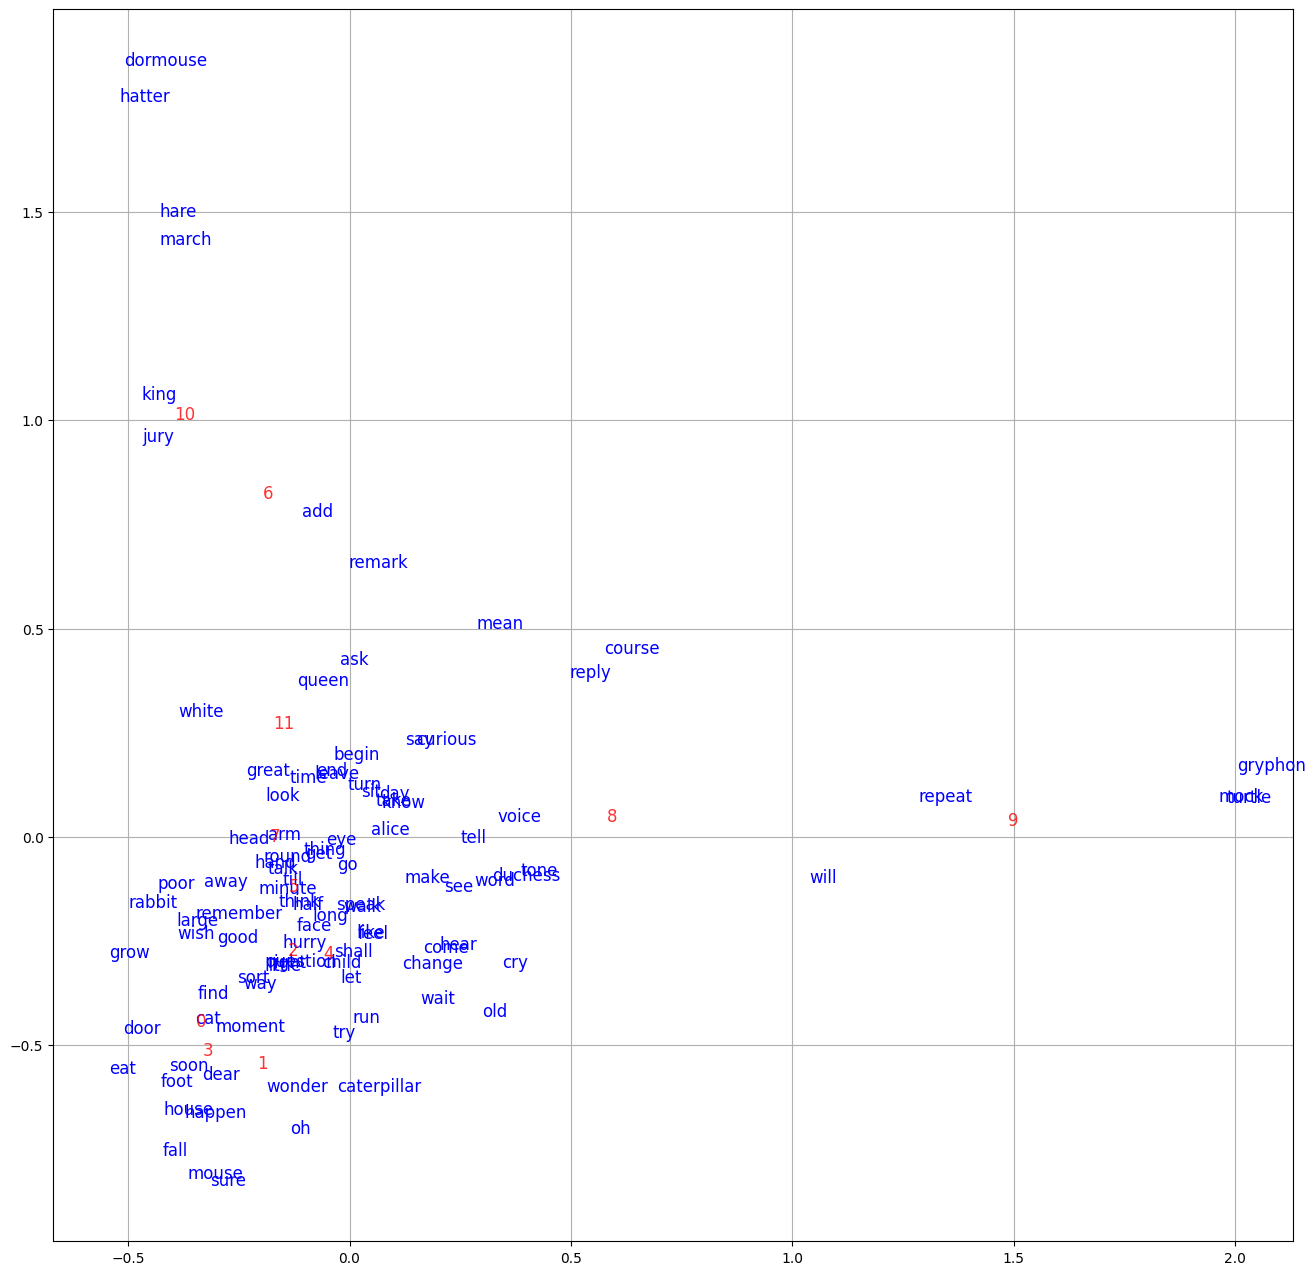

In [ ]:
# Sélection des axes pour le graphique
axes = [0, 1]

# Taille du graphique
plt.rcParams["figure.figsize"] = [16, 16]

# Filtre sur les mots les plus fréquents
top_n = 100
top_words = [word for word, _ in word_freqs[:top_n]]

# On s'assure que "top_words" sont dans le dictionnaire
top_words = [word for word in top_words if word in dictionary.token2id]

top_word_ids = [dictionary.token2id[word] for word in top_words]
top_row_coord = row_coord[top_word_ids, :]

# Coordonnées combinées (mots + documents)
all_coord = np.concatenate([top_row_coord, col_coord])

# Création du graphique
fig, ax = plt.subplots()
ax.scatter(all_coord[:, axes[0]], all_coord[:, axes[1]], alpha=0, color="white")

# Annoter les mots
for i, txt in enumerate(top_words):
    ax.annotate(txt, (top_row_coord[i, axes[0]], top_row_coord[i, axes[1]]), size=12, color="blue")

# Annoter les documents
for i, txt in enumerate(range(len(corpus_filtered_bow))):
    ax.annotate(txt, (col_coord[i, axes[0]], col_coord[i, axes[1]]), size=12, color="red", alpha=0.8)

ax.grid()
plt.show()


##Commentaire 2.4:

Le biplot est une représentation graphique qui combine les termes les plus fréquents du texte (en bleu) et les chapitres du corpus (en rouge). Cette visualisation met en évidence les relations thématiques et lexicographiques entre les chapitres et les mots du texte.

Visualisation des termes :

  - Les mots bleus sur le graphique sont disposés selon leur contribution aux axes principaux de l'analyse factorielle des correspondances (AFC). Leur position reflète leur importance thématique et leur association à des chapitres spécifiques.
  
      - En haut à droite : Les mots comme "gryphon", "mock", et "turtle" sont regroupés, indiquant leur lien avec la scène du Mock Turtle, une partie marquante du récit (chapitre 9).
      - En haut à gauche : Les termes tels que "hatter", "dormouse", et "hare" sont associés à la scène du Chapelier Fou, un moment clé caractérisé par des dialogues absurdes et ludiques.
      - En bas au centre : Des mots comme "alice", "queen", et "rabbit" se trouvent au centre, montrant leur rôle transversal dans plusieurs chapitres. Ces mots sont centraux à l’histoire et apparaissent dans différentes scènes. Nous y trouvons également les mots associés aux émotions d'Alice (good, great, cry, ho etc.) à l'action (run, eat, look, hurry, time etc.) et au monde plus général entourant Alice (world, house, door, way etc.). Tout ceci correspond bien à l'absurdité du récit et aux émotions que ressent Alice fasse aux personnages et leurs actions loufoques (par exemple le fait que certains personnages courent constamment après le "temps" et qu'il y font constamment référence).

Visualisation des chapitres :

  - Les numéros rouges représentent les chapitres du corpus. Leur position indique leur proximité avec les termes qu’ils utilisent fréquemment, par exemple :
      - Chapitre 9 : Positionné près de "gryphon" et "mock", reflétant son association à la scène avec le Mock Turtle.
      - Chapitre 10 : Situé à proximité de "king" et "jury", illustrant son lien direct avec la scène du jugement du roi. Ce chapitre met en avant le tribunal, où les interactions absurdes et les personnages comme le roi et le jury jouent un rôle central. Les mots associés soulignent le cadre juridique et le ton burlesque de cette partie de l'histoire, où les règles sont souvent contournées ou ridiculisées.
      - Chapitre 1 : Plus proche de termes centraux comme "alice" et "rabbit", soulignant son rôle introductif, avec des termes que l'on retrouve tout au long du récit.

Ce graphique mets en lumière des chapitres spécifiques étant étroitement liés à des moments marquants et à des vocabulaires particuliers, tandis que d'autres mots et chapitres jouent un rôle transversal et unificateur.
  

In [ ]:
# Nombre d'axes à analyser
n_axes = 10
# Nombre de mots les plus contributeurs par axe
n_top_words = 10

# Pour chaque axe, calculer le pourcentage d'inertie et les mots principaux
for dim in range(n_axes):
    # Pourcentage d'inertie
    p_var = eig_val[dim] / sum(eig_val) * 100

    # Mots les plus contributeurs
    top_contrib_ids = np.argsort(row_contrib[:, dim])[::-1][:n_top_words]
    contrib_dic = {dictionary[id]: round(row_contrib[id, dim] * 100, 2) for id in top_contrib_ids}

    # Affichage des résultats
    print(f"Axe {dim + 1} :")
    print(f"  Pourcentage d'inertie : {p_var:.2f}%")
    print(f"  Mots les plus contributeurs : {contrib_dic}")
    print("-" * 50)


Axe 1 :
  Pourcentage d'inertie : 18.60%
  Mots les plus contributeurs : {'turtle': 14.04, 'gryphon': 12.96, 'mock': 12.65, 'lobster': 6.9, 'dance': 6.9, 'beautiful': 4.44, 'soup': 4.22, 'join': 3.1, 'sea': 2.76, 'repeat': 1.94}
--------------------------------------------------
Axe 2 :
  Pourcentage d'inertie : 15.74%
  Mots les plus contributeurs : {'hatter': 12.32, 'dormouse': 9.53, 'king': 4.91, 'march': 4.91, 'hare': 4.78, 'court': 4.34, 'tea': 3.48, 'witness': 3.14, 'twinkle': 2.25, 'mouse': 2.23}
--------------------------------------------------
Axe 3 :
  Pourcentage d'inertie : 11.22%
  Mots les plus contributeurs : {'queen': 9.52, 'king': 6.21, 'caterpillar': 5.08, 'dormouse': 3.44, 'hedgehog': 3.1, 'hatter': 2.75, 'soldier': 2.6, 'hare': 2.51, 'serpent': 2.47, 'pigeon': 2.47}
--------------------------------------------------
Axe 4 :
  Pourcentage d'inertie : 10.65%
  Mots les plus contributeurs : {'footman': 7.33, 'king': 6.03, 'cat': 5.6, 'mad': 5.37, 'baby': 3.96, 'jury':

##Partie 3 : Topic modeling

##3.1

100%|██████████| 14/14 [00:34<00:00,  2.48s/it]


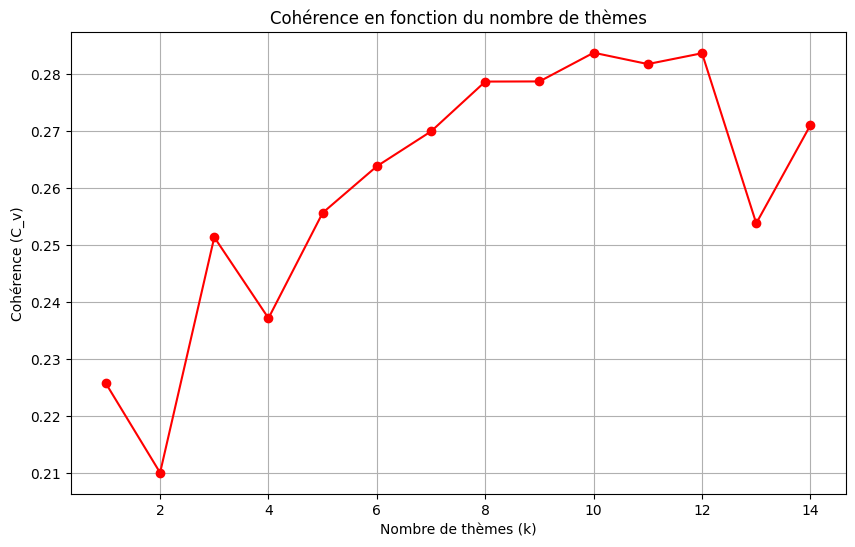

Nombre optimal de thèmes (k) : 10


In [ ]:
import gensim
 # LdaModel pour la modélisation LDA, CoherenceModel pour évaluer la qualité des thèmes
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt
import numpy as np
# Bibliothèque pour afficher une barre de progression lors de boucles longues
from tqdm import tqdm

# Fixer la graine aléatoire
SEED = 42
np.random.seed(SEED)

# Range de valeurs pour le nombre de thèmes k
# Teste les valeurs de k entre 4 et 20
ks = list(range(1, 15))
# Nombre de répétitions par valeur de k
n_tests = 3
coherences = []

# Calculer la cohérence pour chaque k
for k in tqdm(ks):
    sum_coherence = 0
    for _ in range(n_tests):
        # Entraîner un modèle LDA avec k thèmes
        lda_model = LdaModel(corpus_filtered_bow, id2word=dictionary, num_topics=k, passes=10, random_state=SEED)

        # Calculer la cohérence C_v
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence="c_v")
        sum_coherence += coherence_model.get_coherence()

    # Moyenne des cohérences pour cette valeur de k
    coherences.append(sum_coherence / n_tests)

# Tracer la courbe de cohérence en fonction de k
plt.figure(figsize=(10, 6))
plt.plot(ks, coherences, marker='o', color='red')
plt.xlabel("Nombre de thèmes (k)")
plt.ylabel("Cohérence (C_v)")
plt.title("Cohérence en fonction du nombre de thèmes")
plt.grid(True)
plt.show()

# Trouver la valeur optimale de k
optimal_k = ks[np.argmax(coherences)]
print(f"Nombre optimal de thèmes (k) : {optimal_k}")

# Entraîner le modèle LDA final avec k optimal
lda_model = LdaModel(corpus_filtered_bow, num_topics=optimal_k, id2word=dictionary, passes=10, random_state=SEED)


##3.2

In [ ]:
# Entraîner le modèle final avec k optimal (ici 10)
optimal_k = 10
lda_model = LdaModel(corpus_filtered_bow, num_topics=optimal_k, id2word=dictionary, passes=10, random_state=SEED)

# Afficher les thèmes obtenus
topics = lda_model.show_topics(num_topics=optimal_k, num_words=10, formatted=True)
for topic in topics:
    print(f"Thème {topic[0]} : {topic[1]}")


Thème 0 : 0.054*"alice" + 0.035*"little" + 0.027*"think" + 0.025*"say" + 0.023*"go" + 0.021*"rabbit" + 0.019*"come" + 0.018*"find" + 0.018*"way" + 0.017*"like"
Thème 1 : 0.101*"gryphon" + 0.084*"turtle" + 0.074*"mock" + 0.060*"lobster" + 0.060*"dance" + 0.049*"soup" + 0.044*"beautiful" + 0.042*"say" + 0.040*"repeat" + 0.038*"will"
Thème 2 : 0.089*"say" + 0.076*"alice" + 0.051*"hatter" + 0.042*"dormouse" + 0.034*"march" + 0.032*"hare" + 0.027*"time" + 0.023*"go" + 0.022*"know" + 0.021*"thing"
Thème 3 : 0.023*"say" + 0.022*"alice" + 0.011*"queen" + 0.009*"go" + 0.009*"turtle" + 0.008*"look" + 0.007*"mock" + 0.007*"think" + 0.007*"head" + 0.007*"know"
Thème 4 : 0.090*"say" + 0.083*"caterpillar" + 0.053*"alice" + 0.039*"pigeon" + 0.039*"serpent" + 0.026*"think" + 0.024*"size" + 0.023*"minute" + 0.023*"little" + 0.023*"try"
Thème 5 : 0.073*"say" + 0.065*"alice" + 0.032*"queen" + 0.030*"go" + 0.027*"cat" + 0.023*"look" + 0.023*"think" + 0.020*"like" + 0.016*"begin" + 0.016*"head"
Thème 6 : 0

<ipython-input-17-04924ea7e95e>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  topic_color = cm.get_cmap('tab10', optimal_k)


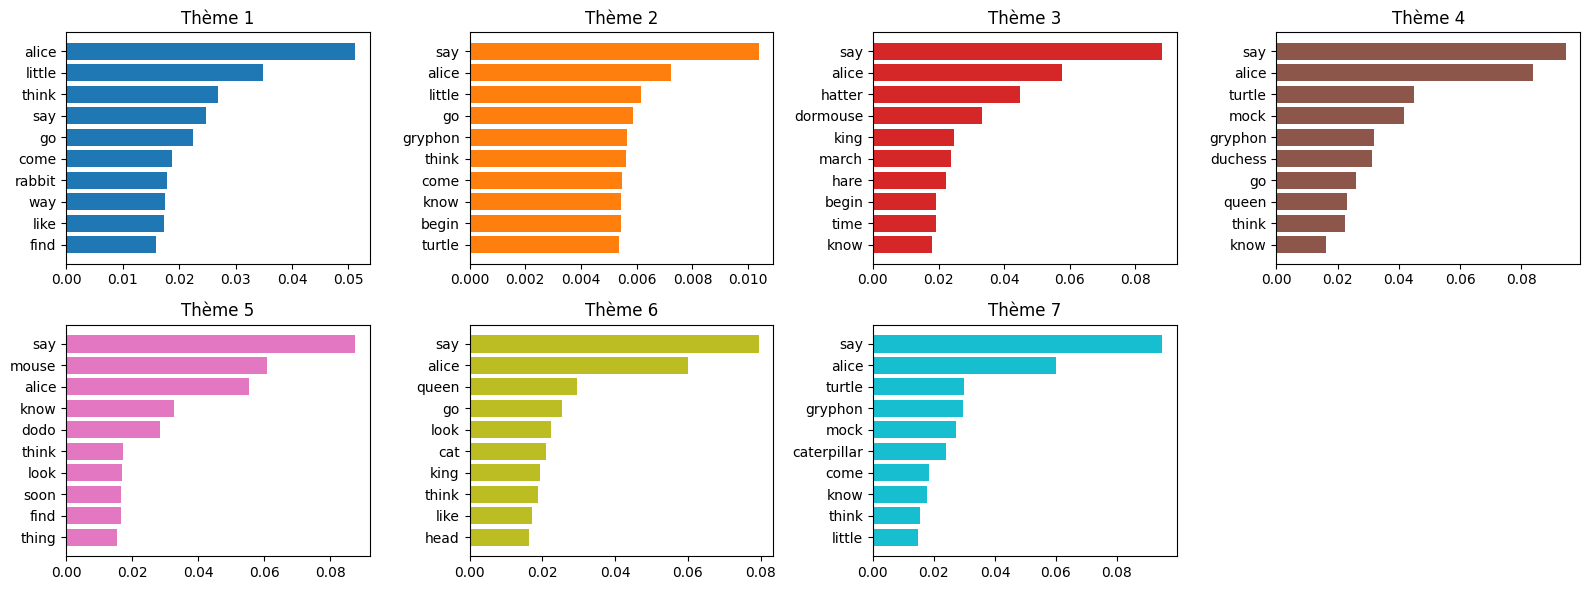

In [ ]:
import matplotlib.pyplot as plt
# Permet de gérer des dispositions de sous-graphiques complexes
from matplotlib.gridspec import GridSpec
import numpy as np
# Fournit des cartes de couleurs pour des graphiques visuellement différenciés
from matplotlib import cm
import random
from gensim.models import LdaModel

# Fixer la graine aléatoire pour toutes les sources d'aléatoire
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# Entraîner le modèle LDA si ce n'est pas déjà fait
optimal_k = 7  # P.S. : Nous avons découvert qu'en mettant 10 comme mon optimal_k (comme trouvé plus haut), trop de thèmes similaires apparaissaient et ils étaient difficiles à différencier. Nous avons donc volontairement réduit ce nombre de thèmes à 7.
lda_model = LdaModel(
    corpus=corpus_filtered_bow,
    id2word=dictionary,
    num_topics=optimal_k,
    passes=10,
    random_state=SEED
)

# Couleurs pour les thèmes avec une palette différenciable
topic_color = cm.get_cmap('tab10', optimal_k)

# Taille de la figure
nx_grid = int(np.sqrt(optimal_k))
ny_grid = int(np.ceil(optimal_k / nx_grid))
plt.rcParams["figure.figsize"] = [ny_grid * 4, nx_grid * 3]
fig = plt.figure()
grid_layout = GridSpec(nx_grid, ny_grid)

# Boucle pour chaque thème
for i in range(optimal_k):
    # Les 10 mots les plus probables pour ce thème
    top_words = lda_model.show_topic(i, topn=10)
    words = [word for word, _ in top_words]
    probs = [prob for _, prob in top_words]

    # Ajouter un graphique
    ax = fig.add_subplot(grid_layout[i])
    ax.barh(words, probs, color=topic_color(i))
    ax.set_title(f"Thème {i + 1}")
    ax.invert_yaxis()

# Ajuster la disposition
grid_layout.tight_layout(fig)
plt.show()



##3.3

<ipython-input-18-8b166252ce0b>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  topic_color = cm.get_cmap('tab10', lda_model.num_topics)


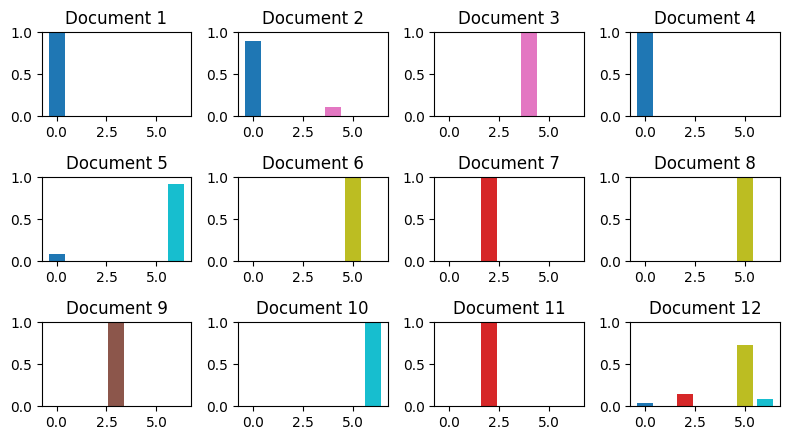

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from matplotlib import cm

# Fixer la graine aléatoire pour garantir la reproductibilité
SEED = 42
np.random.seed(SEED)

# Couleurs pour les thèmes (tab10 pour des couleurs distinctes)
topic_color = cm.get_cmap('tab10', lda_model.num_topics)

# Taille de la grille pour les documents
nx_grid = int(np.sqrt(len(corpus_filtered_bow)))
ny_grid = int(np.ceil(len(corpus_filtered_bow) / nx_grid))
plt.rcParams["figure.figsize"] = [ny_grid * 2, nx_grid * 1.5]
fig = plt.figure()
grid_layout = GridSpec(nx_grid, ny_grid)

# Boucle pour chaque document
for i, document in enumerate(corpus_filtered_bow):
    # Obtenir la répartition des thèmes pour ce document
    topics_freqs = lda_model.get_document_topics(document, minimum_probability=0)
    topics = [topic for topic, _ in topics_freqs]
    freqs = [freq for _, freq in topics_freqs]

    # Ajouter un graphique
    ax = fig.add_subplot(grid_layout[i])
    # Appliquer la couleur correspondant au thème
    colors = [topic_color(topic) for topic in topics]
    ax.bar(topics, freqs, color=colors)
    ax.set_title(f"Document {i + 1}")
    ax.set_ylim([0, 1])

# Ajuster la disposition
grid_layout.tight_layout(fig)
plt.show()



##Commentaire 3.4

Pour identifier le nombre de thèmes idéals (k) dans notre corpus, nous avons utilisé une mesure de cohérence Cv​. Cette mesure évalue la qualité des thèmes en mesurant leur cohérence sémantique, c’est-à-dire la proximité conceptuelle entre les mots dominants au sein d’un même thème.

1. partie 3.2: Répartition des 10 mots les plus probables pour chaque thème (Figure des thèmes):

  Cette figure montre les thèmes identifiés par le modèle LDA et les 10 mots les plus probables associés à chaque thème :

  - Thème 1 : Les mots dominants sont "alice", "little", "think", et "say". Ce thème semble général et reflète les pensées et réflexions d'Alice, un fil conducteur à travers plusieurs chapitres.
  - Thème 2 : Ce thème est assez proche du thème 1, où des mots similaires réapparaissent. Toutefois, les mots comme "gryphon" et "turtle" indiquent une forte association avec les scènes du "Mock Turtle". Ce thème est très spécifique au chapitre 9.
  - Thème 3 : On y retrouve les mots "hatter", "dormouse", "hare" et "king". Ce thème est clairement lié à la scène du Chapelier Fou (chapitre 7), marquée par des dialogues absurdes et des personnages excentriques.
  - Thème 4 : Les mots comme "queen", "duchess", et "mock" pointent vers des interactions royales ou scénarios de cour, peut-être liés aux tensions autour de la Reine de Cœur (dans les chapitres 8, 11 et 12) où les personnages de la tortue et du gryphon sont aussi présents.
  - Thème 5 : Avec "mouse", "dodo", ce thème se concentre sur les interactions animales au début de l’histoire, notamment autour de la mare de larmes où Alice rencontre et interragit avec des personnes étranges que sont la souris et le dodo.
  - Thème 6 : On y retrouve les mots "cat", "queen" et "king". Ce thème semble capturer les moments philosophiques et étranges où Alice rencontre des personnages énigmatiques, comme le chat. Aussi ce thème peut faire référence à des passages où Alice est en interaction ou discute de la cour royale.
  - Thème 7 : Les mots "turtle", "gryphon", et "mock" réapparaissent ici, confirmant une attention particulière pour la scène du Mock Turtle dans plusieurs documents.

Ces thèmes montrent une segmentation claire entre des scènes spécifiques (Chapelier Fou, Mock Turtle) et des motifs récurrents (pensées d’Alice).

2. Répartition des thèmes dans les documents (Figure des documents)

Cette figure illustre la contribution des différents thèmes dans chaque document ou chapitre :

  - Documents 1, 2, et 4 : Ces chapitres du début du récit sont dominés par le thème 1, correspond à la découverte d'Alice et du nouveau monde totalement absurde qui l'entoure. Le lapin est également prédominant dans ces premiers chapitres. Certains mots rappellent des parties spécifiques du récit. Par exemple "little" rappelle le moment dans le chapitre 1 ou Alice est rétrécie. Aussi les mots "go", "way", "rabbit", "come" nous rappelle les chapitre 2 et 4 où Alice et le lapin se baladent et découvrent ce monde imaginaire.
  - Documents 3 : Il est tout à fait cohérent avec le thème 5. En effet, dans ce chapitre, Alice nage dans une mare de larme et y rencontre pleins d'animaux loufoques comme le dodo et la souris qui proposent des jeux pour se sécher. Les dialogues y sont prédominants (d'où l'importance de "say" dans ce thème) et les animaux au centre du dialogue (d'où l'importance de "dodo" et "mouse" dans le thème 5).
  - Documents 5 et 10 : Ces deux documents sont marqués par le thème 7. Ceci est tout à fait cohérent, étant donné que le chapitre 5 est une conversation entre Alice et la chenille (d'où l'importance du mot "caterpillar" dans le thème 7) et le chapitre 10 parle de la rencontre entre Alice, le Mock et le Gryphon (d'où l'importance de ces deux mots également dans le thème 7).
  - Documents 6, 8 et 12 : On y retrouve dans ces trois chapitres essentiellement le thème 6. Ceci est cohérent étant donné que le chapitre 6 traite d'une longue discussion entre Alice et le "cat" (d'où l'importance du mot "cat" dans le thème 6) et les chapitres 8 et 12 sont centrés surtout sur la reine et un petit peu moiuns sur le roi (d'où l'importance de "queen" dans le thème 6 et d'un peu moins du terme "king").
  - Documents 7 et 11 : Nous y trouvons essentiellement le thème 3. Ceci essentiellement car le chapitre 7 traite du chapelier fou ("hatter"), du Loir ("Dormouse") et du lièce ("hare"). Le chapitre 11 traite enssentiellement du roi et du procès pour savoir qui a volé la tarte avec comme jury le Loir et comme témoin le chapelier fou (les mots "King", "Dormouse" et "Hatter" qui sont propres au thème 7).
  - Document 9 : caractérisé par le thème 4. Ce chapitre comprend Alice, accompagné du Gryphon, qui écoutent les tristes histoires de la tortue (d'où l'importance des mots "turtle", "mock" et "gryphon" qui sont des mots importants pour le thème 4).  

  

#Partie 4 : Word embeddings


In [ ]:
import os

# Charger les fichiers pré-traités
corpus_pp_path = "chapters_corrected_preprocessed"
file_names = sorted(os.listdir(corpus_pp_path))

# Liste pour stocker les phrases tokenisées
sentences = []
for file_name in file_names:
    with open(f"{corpus_pp_path}/{file_name}", "r", encoding="utf-8") as text_file:
        # Lire chaque ligne comme une phrase
        text_sentences = text_file.readlines()
        # Chaque phrase est une liste de tokens
        text_token_sentences = [text_sentence.split() for text_sentence in text_sentences]
        sentences.extend(text_token_sentences)

# Exemple d'une phrase tokenisée
print("Exemple d'une phrase tokenisée :", sentences[0])


Exemple d'une phrase tokenisée : ['rabbit', 'hole', 'alice', 'begin', 'tired', 'sit', 'sister', 'bank', 'have', 'twice', 'peep', 'book', 'sister', 'read', 'picture', 'conversation', 'use', 'book', 'think', 'alice', 'picture', 'conversation']


##4.1

In [ ]:
# Modèle pour créer des représentations vectorielles de mots (word embeddings)
from gensim.models import Word2Vec

# Entraîner un modèle Word2Vec avec les paramètres spécifiés
wv_model = Word2Vec(
    sentences,
    min_count=5, #ici nous filtrons les mots les moins fréquents
    window=5, #fenêtre de 5 mots
    vector_size=300, #vecteur de taille 300
    sg=1,
    epochs=10
)

# Taille du vocabulaire après filtrage
wv_vocab = wv_model.wv.key_to_index
print(f"Taille du vocabulaire : {len(wv_vocab)}")


Taille du vocabulaire : 472


In [ ]:
print("alice" in wv_vocab)
print("queen" in wv_vocab)


True
True


In [ ]:
# Afficher les 10 premières coordonnées du vecteur du mot "alice"
vector_alice = wv_model.wv.get_vector("alice")[:10]
print("Vecteur de 'alice' :", vector_alice)


Vecteur de 'alice' : [ 0.03242141  0.12929495 -0.00887352  0.08110716  0.03587078 -0.13444693
  0.05524455  0.18889318  0.00289246 -0.04072254]


In [ ]:
# Calculer la similarité cosinus entre deux mots
print("Similarité entre 'alice' et 'queen' :", wv_model.wv.similarity("alice", "queen"))
print("Similarité entre 'alice' et 'rabbit' :", wv_model.wv.similarity("alice", "rabbit"))



Similarité entre 'alice' et 'queen' : 0.9985081
Similarité entre 'alice' et 'rabbit' : 0.9972324


In [ ]:
# Trouver les mots les plus similaires à "alice"
print("Mots les plus similaires à 'alice' :", wv_model.wv.most_similar("alice"))


Mots les plus similaires à 'alice' : [('want', 0.9988974928855896), ('dodo', 0.9988600015640259), ('help', 0.9988497495651245), ('whiting', 0.9988468289375305), ('finish', 0.9988433718681335), ('pack', 0.9988403916358948), ('world', 0.9988383650779724), ('pick', 0.9988179206848145), ('somebody', 0.9988113045692444), ('exactly', 0.9988073706626892)]


##4.2

In [ ]:
# Choisir trois termes pertinents
terms = ["alice", "rabbit", "queen"]

# Afficher les 10 mots les plus proches pour chaque terme
for term in terms:
    if term in wv_vocab:
        print(f"10 mots les plus proches de '{term}' :")
        similar_words = wv_model.wv.most_similar(term, topn=10)
        for word, similarity in similar_words:
            print(f"  {word} (similarité : {similarity:.4f})")
        print()
    else:
        print(f"Le mot '{term}' n'est pas dans le vocabulaire du modèle.")


10 mots les plus proches de 'alice' :
  want (similarité : 0.9989)
  dodo (similarité : 0.9989)
  help (similarité : 0.9988)
  whiting (similarité : 0.9988)
  finish (similarité : 0.9988)
  pack (similarité : 0.9988)
  world (similarité : 0.9988)
  pick (similarité : 0.9988)
  somebody (similarité : 0.9988)
  exactly (similarité : 0.9988)

10 mots les plus proches de 'rabbit' :
  kid (similarité : 0.9987)
  pair (similarité : 0.9985)
  majesty (similarité : 0.9983)
  blow (similarité : 0.9982)
  witness (similarité : 0.9982)
  glove (similarité : 0.9982)
  hand (similarité : 0.9981)
  king (similarité : 0.9981)
  evidence (similarité : 0.9981)
  read (similarité : 0.9981)

10 mots les plus proches de 'queen' :
  consider (similarité : 0.9990)
  arch (similarité : 0.9990)
  sentence (similarité : 0.9990)
  behead (similarité : 0.9990)
  fetch (similarité : 0.9990)
  bow (similarité : 0.9990)
  scream (similarité : 0.9990)
  tart (similarité : 0.9990)
  miss (similarité : 0.9990)
  execu

##4.3

In [ ]:
# Extraire les mots du vocabulaire et leurs fréquences
word_freq = [(word, wv_model.wv.get_vecattr(word, "count")) for word in wv_vocab]

# Trier les mots par fréquence décroissante
word_freq = sorted(word_freq, key=lambda item: item[1], reverse=True)

# Garder les 100 mots les plus fréquents
top_words = word_freq[:100]

# Afficher les 10 mots les plus fréquents
print("10 mots les plus fréquents :", top_words[:10])


10 mots les plus fréquents : [('say', 481), ('alice', 394), ('think', 133), ('go', 130), ('little', 128), ('know', 107), ('look', 106), ('like', 92), ('begin', 92), ('come', 90)]


In [ ]:
import numpy as np

# Initialiser un tableau pour stocker les vecteurs
top_vectors = np.empty((len(top_words), 300), dtype="f")

# Remplir le tableau avec les vecteurs des 100 mots les plus fréquents
for i, (word, _) in enumerate(top_words):
    top_vectors[i] = wv_model.wv.get_vector(word)

# Dimensions des vecteurs
print("Dimensions des vecteurs extraits :", top_vectors.shape)


Dimensions des vecteurs extraits : (100, 300)


In [ ]:
# Technique pour la réduction dimensionnelle, adaptée à la visualisation des données de grande dimension
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Fixer un random seed pour garantir des résultats reproductibles
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)  # Fixer le seed pour NumPy (utile si d'autres parties du code l'utilisent)


# Réduction dimensionnelle avec t-SNE
# Réduction dimensionnelle avec t-SNE pour réduire les vecteurs à 2 dimensions (x, y), avec perplexité=5 pour ajuster la taille locale, init="pca" pour une initialisation via PCA, et learning_rate="auto" pour un taux d'apprentissage automatique adapté.
coords_2d = TSNE(n_components=2, perplexity=5, init="pca", learning_rate="auto", random_state=RANDOM_SEED).fit_transform(top_vectors)

# Afficher les dimensions des coordonnées réduites
print("Dimensions après t-SNE :", coords_2d.shape)


Dimensions après t-SNE : (100, 2)


##4.4

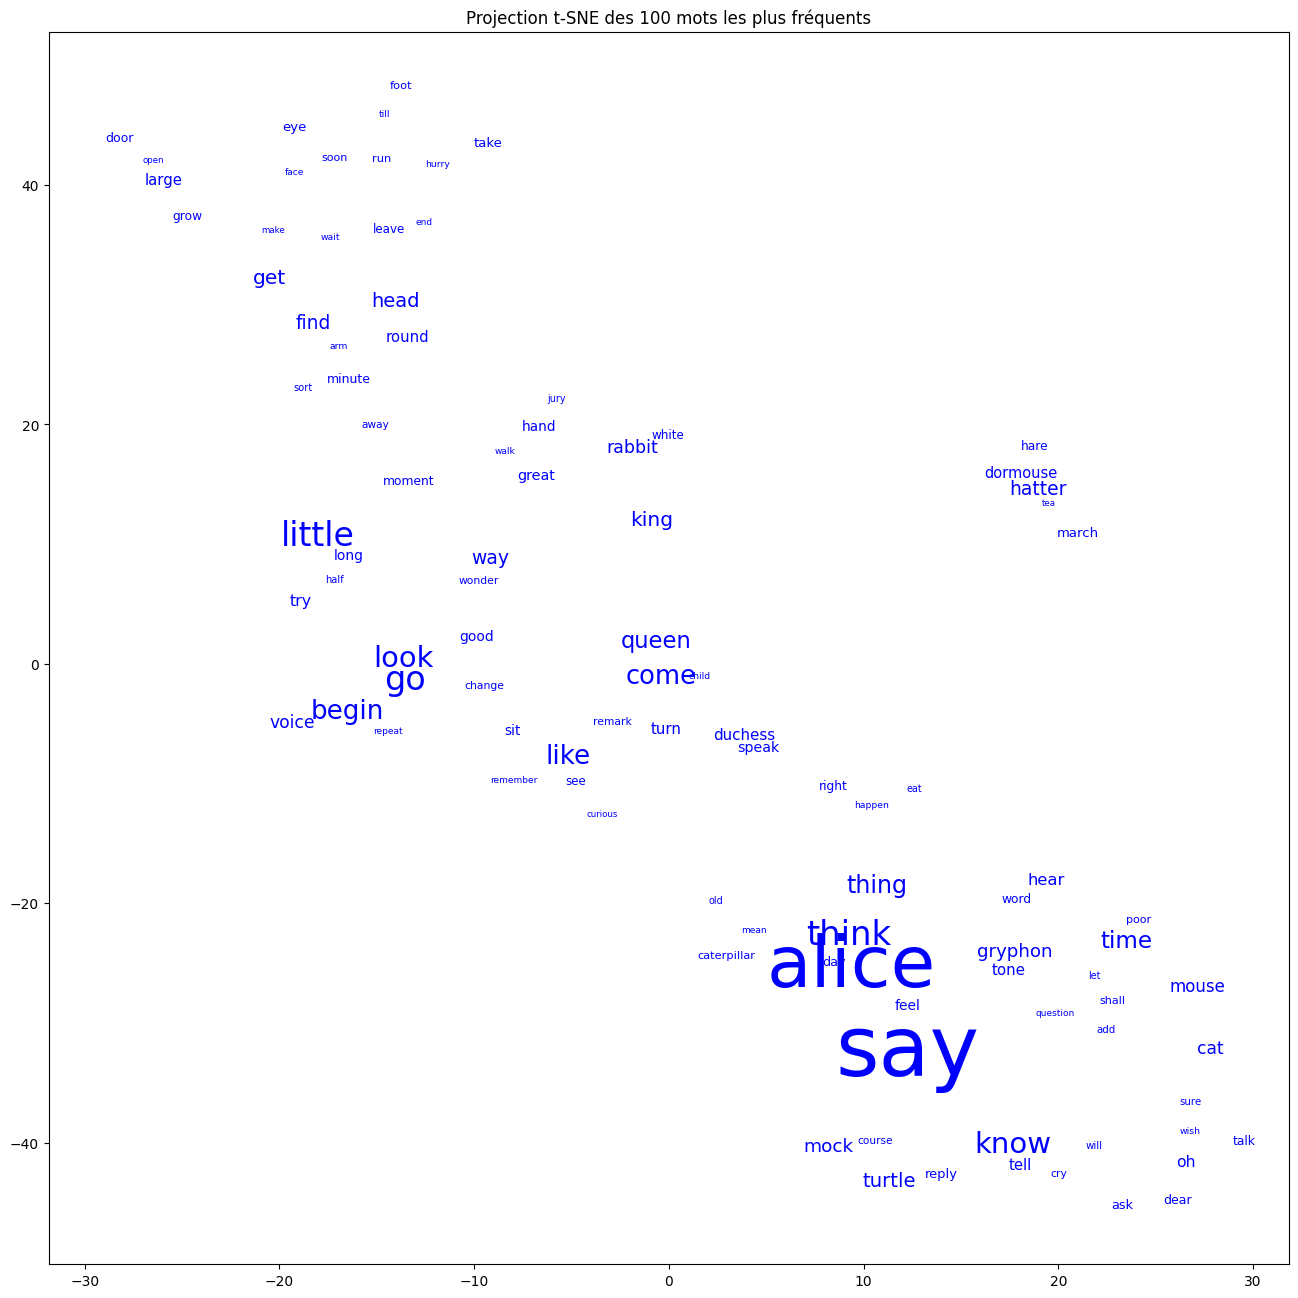

In [ ]:
# Créer un graphique 2D
plt.figure(figsize=(16, 16))
plt.scatter(coords_2d[:, 0], coords_2d[:, 1], alpha=0)

# Annoter les mots dans le graphe en 2D avec une taille proportionnelle à leur fréquence, en utilisant une couleur bleue et un positionnement basé sur leurs coordonnées.
for (word, freq), x, y in zip(top_words, coords_2d[:, 0], coords_2d[:, 1]):
    plt.annotate(
        word, xy=(x, y), xytext=(0, 0),
        textcoords="offset points",
        size=(freq / top_words[0][1])**(0.7)*60,
        color="blue"
    )


# Titre et affichage
plt.title("Projection t-SNE des 100 mots les plus fréquents")
plt.show()


##commentaire 4.4:

Le graphique t-SNE projette les représentations vectorielles des 100 mots les plus fréquents du corpus dans un espace bidimensionnel. Les positions des mots dans cet espace indiquent leur proximité sémantique et contextuelle dans le texte.

Ainsi, en observant le graphique, on observe différentes proximités entre les mots, montrant différents aspects du texte. Tout d'abord, Alice, étant un mot très fréquent (apparaissant en gros dans le graphique) se situe proche des mots "say", "think", "feel", "know". Ceci pourrait refléter les pensées et les réflexions d'Alice qui sont au coeur du récit : ses interrogations quant aux personnages absurdes et face au monde étrange qui l'entoure.

Un autre point intéressant concerne la proximité des personnages dans le graphique en lien avec leurs interactions. Par exemple, on retrouve les mots "duchess", "queen" et "speak" symbolisant les scènes de cours, caractérisées par des tensions entre ces deux personnages. Aussi, nous retrouvons une proximité entre les mots "turtle", "mock", "gryphon" et "Alice" correspondant à la scène où Alice interagit avec le Mock Turtle et le Gryphon dans une discussion absurde et émotionnelle. Enfin, le cluster de mots "hare", "dormouse", "hatter", "tea", "march" représente très clairement la scène du thé avec le chapelier fou du chapitre 7 et les interactions absurdes caractérisant cet épisode.

Enfin, on retrouve des mots d'action et de narration, par exemple "go", "come", "look", "find", dispersés vers le centre du graphique, et qui reflètent les actions et transitions récurrentes dans l'histoire. Ils permettent de structurer la progression narrative.



#Partie 5 : Génération de séquences avec LSTM

##5.1

In [ ]:
# Bibliothèque pour le calcul numérique avec GPU, utilisée ici pour le deep learning
import torch
# Classe utilitaire pour créer des ensembles de données personnalisés dans PyTorch.
from torch.utils.data import Dataset
import os

RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


#        Initialisation du Dataset.

#        Arguments:
#        - file_path : chemin vers le fichier texte.
#        - seq_len : longueur des séquences (𝑘 tokens).
class TokenSequenceDataset(Dataset):
    def __init__(self, file_path, seq_len):
        self.seq_len = seq_len

        # Lecture du fichier texte
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()

        # Tokenisation simple en mots (peut être remplacé par une tokenisation plus complexe)
        self.tokens = text.split()

        # Tri du vocabulaire pour garantir un ordre déterministe
        self.dictionary = sorted(list(set(self.tokens)))  # Tri alphabétique
        self.token2id = {token: idx for idx, token in enumerate(self.dictionary)}
        self.id2token = {idx: token for idx, token in enumerate(self.dictionary)}


        # Conversion des tokens en IDs
        self.token_ids = [self.token2id[token] for token in self.tokens]

# Retourne la taille du dataset (nombre de séquences possibles).
    def __len__(self):
        return len(self.token_ids) - self.seq_len

#         Retourne un couple entrée-sortie pour un index donné.

#        Arguments:
#        - idx : index de la séquence dans le dataset.

#        Retour :
#        - entrée (torch.Tensor) : séquence de 𝑘 tokens (𝑘 IDs).
#        - sortie (torch.Tensor) : séquence de 𝑘 tokens décalée d’un token sur la droite.
    def __getitem__(self, idx):
        input_seq = torch.tensor(self.token_ids[idx:idx + self.seq_len], dtype=torch.long)
        output_seq = torch.tensor(self.token_ids[idx + 1:idx + self.seq_len + 1], dtype=torch.long)
        return input_seq, output_seq

# Exemple d'utilisation
file_path = "chapters_corrected/chapter_01.txt"
seq_len = 10

# Création de l'instance du Dataset
dataset = TokenSequenceDataset(file_path, seq_len)

# Vérification de la taille du dataset
print(f"Taille du Dataset : {len(dataset)}")

# Exemple d'accès à une paire entrée-sortie
sample_input, sample_output = dataset[0]
print("Exemple de séquence d'entrée :", sample_input)
print("Exemple de séquence de sortie :", sample_output)

# Pour afficher les tokens d'origine
print("Séquence d'entrée (tokens) :", [dataset.id2token[token.item()] for token in sample_input])
print("Séquence de sortie (tokens) :", [dataset.id2token[token.item()] for token in sample_output])


Taille du Dataset : 2134
Exemple de séquence d'entrée : tensor([ 25, 667,  52,  12, 740, 131, 701, 305, 731, 700])
Exemple de séquence de sortie : tensor([667,  52,  12, 740, 131, 701, 305, 731, 700, 490])
Séquence d'entrée (tokens) : ['Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired']
Séquence de sortie (tokens) : ['the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of']


##5.3

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import os

RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False



#        Initialisation du Dataset.

#        Arguments:
#        - file_path : chemin vers le fichier texte.
#        - seq_len : longueur des séquences (𝑘 tokens).
class TokenSequenceDataset(Dataset):
    def __init__(self, file_path, seq_len):
        self.seq_len = seq_len

        # Lecture du fichier texte
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()

        # Tokenisation simple en mots
        self.tokens = text.split()

        # Tri du vocabulaire pour garantir un ordre déterministe
        self.dictionary = sorted(list(set(self.tokens)))
        self.token2id = {token: idx for idx, token in enumerate(self.dictionary)}
        self.id2token = {idx: token for idx, token in enumerate(self.dictionary)}


        # Conversion des tokens en IDs
        self.token_ids = [self.token2id[token] for token in self.tokens]

# Retourne la taille du dataset (nombre de séquences possibles).
    def __len__(self):
        return len(self.token_ids) - self.seq_len



#        Retourne un couple entrée-sortie pour un index donné.

#        Arguments:
#        - idx : index de la séquence dans le dataset.

#        Retour :
#        - entrée (torch.Tensor) : séquence de 𝑘 tokens (𝑘 IDs).
#        - sortie (torch.Tensor) : séquence de 𝑘 tokens décalée d’un token sur la droite.
    def __getitem__(self, idx):
        input_seq = torch.tensor(self.token_ids[idx:idx + self.seq_len], dtype=torch.long)
        output_seq = torch.tensor(self.token_ids[idx + 1:idx + self.seq_len + 1], dtype=torch.long)
        return input_seq, output_seq


# Chemins vers 3 documents distincts du corpus
doc_paths = [
    "chapters_corrected/chapter_01.txt",
    "chapters_corrected/chapter_05.txt",
    "chapters_corrected/chapter_10.txt"
]

# Longueur de séquences 𝑘
seq_len = 10

# Création des 3 datasets
datasets = [TokenSequenceDataset(doc_path, seq_len) for doc_path in doc_paths]

# Création des DataLoaders avec un batch de 128
batch_size = 128
dataloaders = [DataLoader(dataset, batch_size=batch_size, shuffle=False) for dataset in datasets]

# Vérification des tailles de chaque Dataset
for i, dataset in enumerate(datasets):
    print(f"Taille du Dataset {i+1} : {len(dataset)}")

# Exemple de lecture d'un batch pour le premier DataLoader
for batch_idx, (inputs, outputs) in enumerate(dataloaders[0]):
    print(f"Batch {batch_idx+1} - Entrée : {inputs.shape}, Sortie : {outputs.shape}")
# Affiche un seul batch pour tester
    break


Taille du Dataset 1 : 2134
Taille du Dataset 2 : 2154
Taille du Dataset 3 : 2018
Batch 1 - Entrée : torch.Size([128, 10]), Sortie : torch.Size([128, 10])


In [ ]:
# Vérification manuelle de quelques exemples de batch, leurs tokens et vérifiant le décalage entre l'entrée et la sortie.
for inputs, outputs in dataloaders[0]:
    # Vérifions 3 séquences du batch
    for i in range(3):
        input_tokens = [datasets[0].id2token[token.item()] for token in inputs[i]]
        output_tokens = [datasets[0].id2token[token.item()] for token in outputs[i]]
        print("Entrée :", input_tokens)
        print("Sortie :", output_tokens)
        print("Décalage correct :", input_tokens[1:] == output_tokens[:-1])
        print("-" * 50)
    break


Entrée : ['Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired']
Sortie : ['the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of']
Décalage correct : True
--------------------------------------------------
Entrée : ['the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of']
Sortie : ['Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting']
Décalage correct : True
--------------------------------------------------
Entrée : ['Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting']
Sortie : ['Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by']
Décalage correct : True
--------------------------------------------------


In [ ]:
# Affichage de quelques tokens uniques dans chaque dataset
for i, dataset in enumerate(datasets):
    print(f"Dataset {i+1} - Nombre de tokens uniques : {len(dataset.dictionary)}")
    print("Exemple de tokens :", list(dataset.dictionary)[:10])
    print("-" * 50)


Dataset 1 - Nombre de tokens uniques : 811
Exemple de tokens : ['(Alice', '(Dinah', '(Which', '(and', '(as', '(for,', '(it', '(she', '(though', '(when']
--------------------------------------------------
Dataset 2 - Nombre de tokens uniques : 876
Exemple de tokens : ['(it', 'Advice', 'After', 'Alice', 'Alice,', 'Alice.', 'Alice:', 'Alice;', 'Allow', 'And']
--------------------------------------------------
Dataset 3 - Nombre de tokens uniques : 842
Exemple de tokens : ['(Alice', '(“I', 'Alice', 'Alice)—“and', 'Alice,', 'Alice.', 'Alice;', 'And', 'As', 'At']
--------------------------------------------------


In [ ]:
# Inspectons 3 exemples au hasard
for i in range(3):
    input_seq, output_seq = datasets[0][i]
    print("Entrée :", [datasets[0].id2token[token.item()] for token in input_seq])
    print("Sortie :", [datasets[0].id2token[token.item()] for token in output_seq])
    print("-" * 50)


Entrée : ['Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired']
Sortie : ['the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of']
--------------------------------------------------
Entrée : ['the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of']
Sortie : ['Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting']
--------------------------------------------------
Entrée : ['Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting']
Sortie : ['Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by']
--------------------------------------------------


In [ ]:
# Comparer les vocabulaires des datasets pour afficher les tokens communs entre eux.
vocab_1 = set(datasets[0].dictionary)
vocab_2 = set(datasets[1].dictionary)
vocab_3 = set(datasets[2].dictionary)

print("Tokens communs entre Dataset 1 et 2 :", len(vocab_1 & vocab_2))
print("Tokens communs entre Dataset 2 et 3 :", len(vocab_2 & vocab_3))
print("Tokens communs entre Dataset 1 et 3 :", len(vocab_1 & vocab_3))


Tokens communs entre Dataset 1 et 2 : 263
Tokens communs entre Dataset 2 et 3 : 260
Tokens communs entre Dataset 1 et 3 : 230


In [ ]:
# Afficher la forme des batches et inspecter un exemple d'entrée et de sortie dans le premier batch du premier dataset
for batch_idx, (inputs, outputs) in enumerate(dataloaders[0]):
    print("Batch d'entrée :", inputs.shape)
    print("Batch de sortie :", outputs.shape)
    print("Exemple d'entrée :", [datasets[0].id2token[token.item()] for token in inputs[0]])
    print("Exemple de sortie :", [datasets[0].id2token[token.item()] for token in outputs[0]])
    break


Batch d'entrée : torch.Size([128, 10])
Batch de sortie : torch.Size([128, 10])
Exemple d'entrée : ['Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired']
Exemple de sortie : ['the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of']


##5.4

In [ ]:
import torch
# Module contenant des blocs de construction pour les réseaux de neurones, comme LSTM, Embedding, et Linear.
from torch import nn


RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


#        Modèle LSTM pour génération de texte.

#        Arguments :
#        - nwords : taille du vocabulaire.
#        - embedding_dim : dimension de l'embedding (par défaut 128).
#        - hidden_size : taille des états cachés des LSTM (par défaut 128).
#        - num_layers : nombre de couches LSTM (par défaut 3).
#        - dropout : taux de dropout pour les LSTM (par défaut 0.2).
class LSTMTextGenerator(nn.Module):
    def __init__(self, nwords, embedding_dim=128, hidden_size=128, num_layers=3, dropout=0.2):

        super(LSTMTextGenerator, self).__init__()

        self.nwords = nwords
        self.embedding_dim = embedding_dim
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Couche d'embedding
        self.embedding = nn.Embedding(
            num_embeddings=self.nwords,
            embedding_dim=self.embedding_dim
        )

        # Couches LSTM
        self.lstm = nn.LSTM(
            input_size=self.embedding_dim,
            hidden_size=self.hidden_size,
            num_layers=self.num_layers,
            dropout=dropout,
            batch_first=True
        )

        # Couche complètement connectée
        self.fc = nn.Linear(self.hidden_size, self.nwords)


#        Passage avant (forward) du modèle.

#        Arguments :
#        - x : séquence d'entrée (batch_size, seq_len).
#        - hidden_state : état caché initial (par défaut None).

#        Retour :
#        - logodds : logits des mots prédits pour la séquence décalée.
#        - hidden_state : nouvel état caché.
    def forward(self, x, hidden_state=None):
        # Embedding
        x = self.embedding(x)

        # LSTM
        lstm_out, hidden_state = self.lstm(x, hidden_state)

        # Couche complètement connectée
        logodds = self.fc(lstm_out)

        return logodds, hidden_state


#        Passage avant (forward) du modèle.

#        Arguments :
#        - x : séquence d'entrée (batch_size, seq_len).
#        - hidden_state : état caché initial (par défaut None).

#        Retour :
#        - logodds : logits des mots prédits pour la séquence décalée.
#        - hidden_state : nouvel état caché.
    def reset_hidden_state(self, batch_size, device):
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        return h0, c0


# Exemple d'initialisation du modèle
nwords = 1000
model = LSTMTextGenerator(nwords)
print(model)


LSTMTextGenerator(
  (embedding): Embedding(1000, 128)
  (lstm): LSTM(128, 128, num_layers=3, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=128, out_features=1000, bias=True)
)


In [ ]:
# Paramètres du test
batch_size = 128
seq_len = 10

# Génération d'une entrée aléatoire (batch_size x seq_len)
dummy_input = torch.randint(0, nwords, (batch_size, seq_len))

# Initialisation des états cachés
hidden_state = model.reset_hidden_state(batch_size, device='cpu')

# Passage avant du modèle
logodds, new_hidden_state = model(dummy_input, hidden_state)

# Vérification des dimensions
print(f"Entrée : {dummy_input.shape}")
print(f"Logodds (sortie) : {logodds.shape}")


Entrée : torch.Size([128, 10])
Logodds (sortie) : torch.Size([128, 10, 1000])


##5.5

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import numpy as np

# Fixer un random seed pour garantir des résultats reproductibles
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Détection automatique de l'appareil (CPU ou GPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device utilisé : {device}")

# Chemins des documents sélectionnés pour l'entraînement
doc_paths = [
    "chapters_corrected/chapter_01.txt",
    "chapters_corrected/chapter_05.txt",
    "chapters_corrected/chapter_10.txt"
]

# Hyperparamètres du modèle (dimensions, couches) et de l'entraînement (batch size, epochs, learning rate)
seq_len = 10
embedding_dim = 128
hidden_size = 128
num_layers = 3
dropout = 0.2
batch_size = 128
n_epochs = 10
learning_rate = 0.001

# Modèle LSTM pour la génération de texte avec embedding, LSTM et couche dense
class LSTMTextGenerator(nn.Module):
    def __init__(self, nwords, embedding_dim=128, hidden_size=128, num_layers=3, dropout=0.2):
        super(LSTMTextGenerator, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=nwords, embedding_dim=embedding_dim)
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, nwords)

    # Passage avant avec les données d'entrée et états cachés
    def forward(self, x, hidden_state=None):
        embed = self.embedding(x)
        lstm_out, hidden_state = self.lstm(embed, hidden_state)
        logodds = self.fc(lstm_out)
        return logodds, hidden_state

    # Initialisation des états cachés (h0, c0) à zéro
    def reset_hidden_state(self, batch_size, device):
        h0 = torch.zeros(num_layers, batch_size, hidden_size).to(device)
        c0 = torch.zeros(num_layers, batch_size, hidden_size).to(device)
        return h0, c0

# Fonction pour entraîner le modèle avec le dataloader, modèle, optimiseur et fonction de perte spécifiés
def train_model(dataloader, model, optimizer, loss_fn, n_epochs, device):
    model.to(device)
    for epoch in range(n_epochs):
        model.train()
        total_loss = 0
        for inputs, outputs in dataloader:
            inputs, outputs = inputs.to(device), outputs.to(device)

            # Réinitialisation des gradients
            optimizer.zero_grad()

            # Réinitialisation des états cachés
            hidden_state = model.reset_hidden_state(inputs.size(0), device)

            # Passage avant
            logodds, _ = model(inputs, hidden_state)

            # Calcul de la perte
            loss = loss_fn(logodds.transpose(1, 2), outputs)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {total_loss / len(dataloader):.4f}")

# Création, entraînement et stockage des modèles pour chaque document
models = []
for i, doc_path in enumerate(doc_paths):
    print(f"\n--- Modèle {i+1} : Entraînement sur {doc_path} ---")

    # Création du Dataset et DataLoader
    dataset = TokenSequenceDataset(doc_path, seq_len)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Taille du vocabulaire
    nwords = len(dataset.dictionary)

    # Création du modèle
    model = LSTMTextGenerator(nwords, embedding_dim, hidden_size, num_layers, dropout)

    # Optimiseur et fonction de perte
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    loss_fn = nn.CrossEntropyLoss()

    # Entraînement du modèle
    train_model(dataloader, model, optimizer, loss_fn, n_epochs, device)

    # Stockage du modèle
    models.append(model)

print("\nEntraînement terminé pour les 3 modèles.")



Device utilisé : cpu

--- Modèle 1 : Entraînement sur chapters_corrected/chapter_01.txt ---
Epoch 1/10, Loss: 6.5380
Epoch 2/10, Loss: 6.0086
Epoch 3/10, Loss: 5.9051
Epoch 4/10, Loss: 5.8681
Epoch 5/10, Loss: 5.8539
Epoch 6/10, Loss: 5.8414
Epoch 7/10, Loss: 5.8359
Epoch 8/10, Loss: 5.8286
Epoch 9/10, Loss: 5.8219
Epoch 10/10, Loss: 5.8037

--- Modèle 2 : Entraînement sur chapters_corrected/chapter_05.txt ---
Epoch 1/10, Loss: 6.6193
Epoch 2/10, Loss: 6.1218
Epoch 3/10, Loss: 6.0327
Epoch 4/10, Loss: 6.0038
Epoch 5/10, Loss: 5.9858
Epoch 6/10, Loss: 5.9751
Epoch 7/10, Loss: 5.9685
Epoch 8/10, Loss: 5.9626
Epoch 9/10, Loss: 5.9554
Epoch 10/10, Loss: 5.9389

--- Modèle 3 : Entraînement sur chapters_corrected/chapter_10.txt ---
Epoch 1/10, Loss: 6.6465
Epoch 2/10, Loss: 6.1337
Epoch 3/10, Loss: 5.9983
Epoch 4/10, Loss: 5.9625
Epoch 5/10, Loss: 5.9436
Epoch 6/10, Loss: 5.9239
Epoch 7/10, Loss: 5.9021
Epoch 8/10, Loss: 5.8650
Epoch 9/10, Loss: 5.7866
Epoch 10/10, Loss: 5.6802

Entraînement

##5.6

In [ ]:
import numpy as np  # Bibliothèque pour les calculs numériques
import textwrap  # Bibliothèque pour formater le texte avec des retours à la ligne
import torch  # Bibliothèque pour le deep learning

# Fixer un random seed pour garantir la reproductibilité
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


#    Générez une séquence de texte aléatoire à partir d'un modèle LSTM entraîné.

#    Arguments :
#    - model : modèle LSTM entraîné.
#    - start_sequence : séquence initiale sous forme de texte.
#    - dataset : dataset utilisé pour récupérer les dictionnaires token->id et id->token.
#    - n_generated_tokens : nombre de tokens à générer (par défaut 200).
#    - device : dispositif de calcul ('cpu' ou 'cuda').

#    Retour :
#    - Texte généré sous forme de chaîne.

def generate_text(model, start_sequence, dataset, n_generated_tokens=200, device="cpu"):

    model.eval()
    model.to(device)

    # Conversion de la séquence initiale en indices numériques
    input_tokens = start_sequence.split()
    input_ids = [dataset.token2id[token] for token in input_tokens if token in dataset.token2id]
    input_tensor = torch.tensor(input_ids, dtype=torch.long).unsqueeze(0).to(device)

    # Initialisation de l'état caché du LSTM
    hidden_state = model.reset_hidden_state(batch_size=1, device=device)

    # Liste pour stocker les tokens générés
    generated_tokens = input_tokens[:]

    # Génération des n_generated_tokens
    for _ in range(n_generated_tokens):
        # Passage avant dans le modèle pour obtenir les logits
        logodds, hidden_state = model(input_tensor, hidden_state)

        # Appliquer softmax pour convertir les logits en probabilités
        probs = torch.nn.functional.softmax(logodds[0, -1], dim=0).detach().cpu().numpy()

        # Sélection du prochain token en fonction des probabilités
        next_token_id = np.random.choice(len(probs), p=probs)
        next_token = dataset.id2token[next_token_id]

        # Ajouter le token généré à la liste
        generated_tokens.append(next_token)

        # Mettre à jour le tenseur d'entrée avec le nouveau token
        input_tensor = torch.tensor([[next_token_id]], dtype=torch.long).to(device)

    # Joindre les tokens générés en une chaîne de texte et la retourner
    return " ".join(generated_tokens)

# Génération de texte pour les 3 modèles avec différentes séquences initiales
start_sequences = [
    "Alice was beginning",
    "She thought that",
    "The rabbit said"
]

# Liste pour stocker les textes générés
generated_texts = []
for i, model in enumerate(models):
    print(f"\n--- Texte généré par le modèle {i+1} ---")
    dataset = TokenSequenceDataset(doc_paths[i], seq_len)
    generated_text = generate_text(model, start_sequences[i], dataset, n_generated_tokens=200, device=device)
    generated_texts.append(generated_text)
    print(textwrap.fill(generated_text, width=80))




--- Texte généré par le modèle 1 ---
Alice was beginning herself, when that’s pictures at asking! There too out so
Dinah, world to cheated best bleeds; for not it for reach and for here learnt
the but not out Oh, rat-hole: be _through_ when wonder those flowers about she
it?) and me,” I was down. she getting!” no of book worth the what waiting
passed; was a but No, glass house!” enough time her ever of and this a “I the
but Alice time sticks the the a hand among too practice had Would found golden
that’s see, very large and such the of the lock, no it How alas! I remember
funny marked was doorway; in the creep a fall at way?”, think saw. tumbling this
bottle very neck think very for all curiosity, it to too Alice no it country and
hall, were generally moment slippery; her you with door mice find fallen I
peeped me Rabbit ever was didn’t answer locked; “Do did she the dark that
herself say saw not a tiny generally bottle I’ve only she Alice, marked could,
row because she if went and ha

##commentaire 5.6:

Ayant généré des textes aléatoires de 200 tokens à partir de modèles LSTM entraînés sur trois chapitres : le chapitre 1, le chapitre 5, et le chapitre 10, vérifions si les textes générés reflètent des caractéristiques lexicales, stylistiques ou thématiques propres aux documents utilisés pour l'entraînement.

Pour le texte généré par le modèle 1, plusieurs éléments récurrents ressortent et reflètent bien la thématique du chapitre 1, où Alice tombe dans le terrier du lapin et commence à explorer le monde souterrain. Les mots comme "Alice", "curiosity", "bottle", "fall", "rabbit" et "door" apparaissent fréquemment, capturant des moments clés du chapitre. Par exemple, la mention de "bottle" et "marked" rappelle la scène où Alice trouve une bouteille étiquetée "Drink Me" et rétrécit pour tenter de passer par une petite porte. De plus, des termes comme "doorway", "key", et "hall" évoquent son exploration de l'environnement étrange et ses efforts pour accéder à un nouveau monde.
Le texte généré contient également des éléments comme "fall", "slippery", et "dark", qui renforcent l'idée de la chute initiale et de l'atmosphère mystérieuse de l’histoire. Bien que le texte soit parfois difficilement lisible, il capture le champ lexical du document original et met en avant les thèmes de curiosité et de transformation physique (notamment le "growing" et le "shrinking") caractéristiques du premier chapitre.

Pour le texte généré par le modèle 2, plusieurs éléments caractéristiques du chapitre 5 ressortent de manière cohérente. Les mots comme "Caterpillar", "neck", "serpent", "eggs", et "size" reflètent les interactions d’Alice avec la Chenille et d'autres créatures étranges, ainsi que les discussions absurdes et philosophiques qu'elle a dans ce chapitre. Par exemple, la mention répétée de "Caterpillar" capture parfaitement cette rencontre clé, tandis que "serpent" et "eggs" rappellent l’échange conflictuel avec le Pigeon, qui accuse Alice d’être un serpent venu voler ses œufs.
De plus, les termes "neck", "changes", et "think" font écho aux réflexions d’Alice sur les transformations de sa taille et son identité, des thèmes centraux du chapitre. Les séquences "Why, Caterpillar", "changes has", et "her size" souligne son effort constant pour comprendre les transformations physiques qu’elle subit, tout en dialoguant avec la Chenille, figure sage et mystérieuse. Bien que le texte généré puisse être difficile à lire, il capture efficacement les thèmes et le vocabulaire propres au document source  

Pour le texte généré par le modèle 3, plusieurs aspects lexicaux et thématiques propres au chapitre 10 ressortent clairement. Les mots clés comme "Mock", "Turtle", "Gryphon", "Soo—oop", et "sea" sont emblématiques des interactions absurdes entre Alice, le Mock Turtle et le Gryphon. Ces termes ancrent le texte généré dans l'univers du chapitre 10, où les personnages discutent de manière burlesque des cours sous-marins, de la danse du homard et d'autres éléments absurdes.
La répétition marquée de "Mock" et "said", ainsi que les références à "trial", "beautiful", "lobsters", et "Soo—oop", reflètent les dialogues saccadés et absurdes qui caractérisent ces interactions. Par exemple, la mention de "Soo—oop!" évoque la parodie du langage sérieux autour de la soupe et des homards, un thème comique récurrent dans ce chapitre. De même, des mots comme "Turtle", "repeating", et "Gryphon" rappellent les hésitations et interruptions constantes qui marquent les échanges entre ces personnages.
Enfin, la mention de "Alice", "trial", et "child" illustre l'implication d'Alice dans ces discussions burlesques, tout en soulignant son rôle de spectatrice perplexe face à l'absurdité du Mock Turtle et du Gryphon. Ce texte généré capture donc efficacement l’essence humoristique et répétitive du chapitre 10

#Partie 6 : Analyse des sentiments avec modèle pré-entrainé

##6.1 et 6.2

In [ ]:

import torch
# Modules de Hugging Face pour le traitement de texte avec le modèle pré-entraîné BERT.
from transformers import BertTokenizer, BertModel
# Contient des modules de PyTorch pour construire des réseaux de neurones.
import torch.nn as nn
# Utilisé pour monter Google Drive dans Google Colab, permettant d'accéder au modèle pré-entrainé stockés dans Drive.
from google.colab import drive



# le chemin vers le modèle pré-entraîné. Ce modèle pré-entrainé correspond à celui du professeur qui se trouve sur moodle utilisé dans le tp12.
model_path = "sent_analyser_bert_base.pt"
# Modèle BERT utilisé
model_name = "bert-base-uncased"

# Charger le tokeniseur associé au modèle
tokenizer = BertTokenizer.from_pretrained(model_name)

# Sauvegarder la longueur maximale des tokens acceptés par le modèle
max_length = 512
print(f"Le nombre de tokens maximal accepté par le modèle est : {max_length}")

# Définir la classe du modèle
class SentClassifier(nn.Module):
    def __init__(self, bert_model_name):
        super(SentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.drop = nn.Dropout(p=0.3)
        self.full = nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = bert_output["pooler_output"]
        dropped_out = self.drop(pooled_output)
        return self.full(dropped_out)

# Initialiser l'appareil
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Charger le fichier sauvegardé (inspecter les clés pour éviter les erreurs)
checkpoint = torch.load(model_path, map_location=device)

# Vérifier les clés du modèle sauvegardé
print("Clés dans le checkpoint :", checkpoint.keys())
if "model_state_dict" not in checkpoint:
    raise ValueError("Le checkpoint ne contient pas 'model_state_dict'.")

# Instancier et charger les poids du modèle
sent_classif = SentClassifier(model_name)

# Filtrer les clés inattendues
state_dict = checkpoint["model_state_dict"]
filtered_state_dict = {k: v for k, v in state_dict.items() if k in sent_classif.state_dict()}
missing_keys, unexpected_keys = sent_classif.load_state_dict(filtered_state_dict, strict=False)

# Afficher les clés manquantes ou inattendues
if missing_keys:
    print(f"Clés manquantes dans le modèle chargé : {missing_keys}")
if unexpected_keys:
    print(f"Clés inattendues dans le modèle chargé : {unexpected_keys}")

sent_classif.to(device)
sent_classif.eval()

print("Modèle d'analyse des sentiments chargé avec succès.")

# Fonction pour transformer un texte en entrée compatible avec le modèle
def transform_text_to_model_input(text, tokenizer, max_length):
    encoding = tokenizer.encode_plus(
        text,
        truncation=True,
        max_length=max_length,
        add_special_tokens=True,
        padding="max_length",
        return_attention_mask=True,
        return_tensors="pt"
    )
    return encoding["input_ids"].to(device), encoding["attention_mask"].to(device)

# Exemple de texte court et très positif pour tester. P.S : a aussi été testé de façon très négative et ça fonctionne parfaitement !
example_text = "I am extremely happy and excited about the results!"

# Préparer l'entrée pour le modèle
input_ids, attention_mask = transform_text_to_model_input(example_text, tokenizer, max_length)

# Vérification de la taille des entrées
print(f"Longueur des input_ids : {input_ids.size(1)}")
assert input_ids.size(1) <= max_length, "Erreur : Les input_ids dépassent max_length."

# Passer l'entrée dans le modèle pour tester la prédiction
with torch.no_grad():
    logits = sent_classif(input_ids, attention_mask)
    sentiment_score = torch.sigmoid(logits).item()

print(f"Texte original : {example_text}")
print(f"Score de sentiment : {sentiment_score:.4f}")







/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Le nombre de tokens maximal accepté par le modèle est : 512


<ipython-input-41-e3a52aaeb712>:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=device)


Clés dans le checkpoint : dict_keys(['model_state_dict', 'optimizer_tat_dict', 'scheduler_state_dict'])


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Modèle d'analyse des sentiments chargé avec succès.
Longueur des input_ids : 512
Texte original : I am extremely happy and excited about the results!
Score de sentiment : 0.9876


##6.3


In [ ]:
import numpy as np
from torch.utils.data import Dataset

# Objet Dataset pour un document du corpus, découpé en blocs de taille max_length.
class CorpusDocumentDataset(Dataset):

#        Initialise le Dataset pour un document.

#        Arguments :
#        - file_path : chemin vers le fichier texte du document.
#        - tokenizer : tokeniseur associé au modèle BERT.
#        - max_length : taille maximale des blocs.
#        - transform : fonction de transformation pour préparer les données pour le modèle.
    def __init__(self, file_path, tokenizer, max_length, transform):

        self.file_path = file_path
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.transform = transform

        # Charger le texte du fichier
        with open(self.file_path, "r", encoding="utf-8") as f:
            self.text = f.read()

        # Découper le texte en blocs de tokens
        # Encode le texte complet pour estimer le nombre total de tokens
        tokens = self.tokenizer.encode_plus(
            self.text,
            truncation=False,
            add_special_tokens=False
        )["input_ids"]

        # Calcul du nombre de blocs nécessaires
        n_blocks = (len(tokens) + max_length - 1) // max_length
        # Divise les tokens en blocs de taille max_length
        token_blocks = np.array_split(tokens, n_blocks)

        # Convertir les blocs de tokens en texte pour compatibilité avec le transform
        self.blocks = [
            self.tokenizer.decode(block, skip_special_tokens=True)
            for block in token_blocks
        ]

# Retourne le nombre de blocs dans le document.
    def __len__(self):

        return len(self.blocks)

# Retourne un bloc transformé pour le modèle.
    def __getitem__(self, idx):

        return self.transform(self.blocks[idx], self.tokenizer, self.max_length)

# Exemple d'utilisation
file_path = "chapters_corrected/chapter_01.txt"
max_length = 512
dataset = CorpusDocumentDataset(file_path, tokenizer, max_length, transform_text_to_model_input)

# Vérifions avec un exemple
print(f"Nombre de blocs : {len(dataset)}")
input_ids, attention_mask = dataset[0]
print("Input IDs du premier bloc :", input_ids)
print("Attention Mask du premier bloc :", attention_mask)


Token indices sequence length is longer than the specified maximum sequence length for this model (2713 > 512). Running this sequence through the model will result in indexing errors


Nombre de blocs : 6
Input IDs du premier bloc : tensor([[  101,  2091,  1996, 10442,  1011,  4920,  5650,  2001,  2927,  2000,
          2131,  2200,  5458,  1997,  3564,  2011,  2014,  2905,  2006,  1996,
          2924,  1010,  1998,  1997,  2383,  2498,  2000,  2079,  1024,  2320,
          2030,  3807,  2016,  2018, 21392,  5669,  2046,  1996,  2338,  2014,
          2905,  2001,  3752,  1010,  2021,  2009,  2018,  2053,  4620,  2030,
         11450,  1999,  2009,  1010,  1523,  1998,  2054,  2003,  1996,  2224,
          1997,  1037,  2338,  1010,  1524,  2245,  5650,  1523,  2302,  4620,
          2030, 11450,  1029,  1524,  2061,  2016,  2001,  6195,  1999,  2014,
          2219,  2568,  1006,  2004,  2092,  2004,  2016,  2071,  1010,  2005,
          1996,  2980,  2154,  2081,  2014,  2514,  2200, 17056,  1998,  5236,
          1007,  1010,  3251,  1996,  5165,  1997,  2437,  1037, 10409,  1011,
          4677,  2052,  2022,  4276,  1996,  4390,  1997,  2893,  2039,  1998,
    

##6.4


In [ ]:

import os
import torch
import numpy as np
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm


# Modèle fine-tuné
model_path = "sent_analyser_bert_base.pt"
# Nom du modèle BERT utilisé
model_name = "bert-base-uncased"
# Longueur maximale des séquences
max_length = 512

# Charger le tokenizer
tokenizer = BertTokenizer.from_pretrained(model_name)

# Définir la classe du modèle
class SentClassifier(torch.nn.Module):
    def __init__(self, bert_model_name):
        super(SentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.drop = torch.nn.Dropout(p=0.3)
        self.full = torch.nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        dropout = self.drop(bert_output["pooler_output"])
        logits = self.full(dropout)
        return logits

# Charger le modèle fine-tuné
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sent_classif = SentClassifier(model_name)

checkpoint = torch.load(model_path, map_location=device)

# Charger les poids
missing_keys, unexpected_keys = sent_classif.load_state_dict(checkpoint["model_state_dict"], strict=False)

# Afficher les clés manquantes et inattendues
print("Clés manquantes :", missing_keys)
print("Clés inattendues :", unexpected_keys)

# Réinitialiser les poids pour les clés manquantes (si cela est nécessaire)
for name, param in sent_classif.named_parameters():
    if name in missing_keys:
        print(f"Réinitialisation des poids pour : {name}")
        nn.init.normal_(param, mean=0, std=0.02)

# Finaliser la configuration
sent_classif.to(device)
sent_classif.eval()
print("Modèle d'analyse des sentiments chargé avec succès.")


# Transformation des textes pour le modèle
# Transforme une chaîne de caractères en données prêtes pour le modèle BERT.
def transform_text_to_model_input(text, tokenizer, max_length):

    encoding = tokenizer.encode_plus(
        text,
        truncation=True,
        max_length=max_length,
        add_special_tokens=True,
        padding="max_length",
        return_attention_mask=True,
        return_tensors="pt"
    )
    return encoding["input_ids"].flatten(), encoding["attention_mask"].flatten()

# Définition de la classe Dataset
# Initialise le Dataset pour diviser le texte en blocs compatibles avec le modèle.
class CorpusDocumentDataset(Dataset):
    def __init__(self, file_path, tokenizer, max_length):

        self.tokenizer = tokenizer
        self.max_length = max_length

        # Charger le texte brut
        with open(file_path, "r", encoding="utf-8") as f:
            self.text = f.read()

        # Tokenisation complète du texte
        tokens = self.tokenizer.encode_plus(
            self.text,
            truncation=False,
            add_special_tokens=False
        )["input_ids"]

        # Division en blocs de taille max_length
        n_blocks = (len(tokens) + max_length - 1) // max_length
        self.token_blocks = np.array_split(tokens, n_blocks)

    def __len__(self):
        return len(self.token_blocks)

# Retourne un bloc pré-tokenisé sous forme d'input_ids et attention_mask.
    def __getitem__(self, idx):
        block_tokens = self.token_blocks[idx]
        block_tokens = block_tokens.tolist()

        # Calculer le padding
        block_length = len(block_tokens)
        padding_length = self.max_length - block_length

        if padding_length > 0:
            # Ajouter du padding pour atteindre max_length
            input_ids = block_tokens + [self.tokenizer.pad_token_id] * padding_length
            attention_mask = [1] * block_length + [0] * padding_length
        else:
            # Tronquer si nécessaire
            input_ids = block_tokens[:self.max_length]
            attention_mask = [1] * self.max_length

        return torch.tensor(input_ids, dtype=torch.long), torch.tensor(attention_mask, dtype=torch.long)

# Fonction pour prédire les sentiments
def get_sentiments(file_data, model, batch_size):
    file_data_loader = DataLoader(file_data, batch_size=batch_size)
    file_sents = []

    model.eval()
    with torch.no_grad():
        for inputs, masks in tqdm(file_data_loader, desc="Processing blocks"):
            inputs, masks = inputs.to(device), masks.to(device)
            logits = model(inputs, masks).detach()
            probs = torch.sigmoid(logits)
            file_sents.extend(probs.flatten().tolist())
    return file_sents

# Boucle pour calculer les sentiments
corpus_path = "/content/chapters_corrected"
batch_size = 16

file_names = os.listdir(corpus_path)
file_names.sort()

# Stocker les sentiments pour chaque document
corpus_sents = []
for i, file_name in tqdm(enumerate(file_names), total=len(file_names), desc="Processing documents"):
    file_path = os.path.join(corpus_path, file_name)
    file_data = CorpusDocumentDataset(file_path, tokenizer, max_length)
    file_sents = get_sentiments(file_data, sent_classif, batch_size)
    corpus_sents.append(file_sents)

# Affichage des résultats
for i, file_sents in enumerate(corpus_sents):
    print(f"Document {i + 1} - Sentiment moyen: {np.mean(file_sents):.4f}")




<ipython-input-43-0a31479ffdbe>:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=device)


Clés manquantes : []
Clés inattendues : ['bert.embeddings.position_ids']
Modèle d'analyse des sentiments chargé avec succès.


Processing documents:   0%|          | 0/12 [00:00<?, ?it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (2713 > 512). Running this sequence through the model will result in indexing errors

Processing documents: 100%|██████████| 12/12 [02:21<00:00, 11.81s/it]

Document 1 - Sentiment moyen: 0.2900
Document 2 - Sentiment moyen: 0.3216
Document 3 - Sentiment moyen: 0.3601
Document 4 - Sentiment moyen: 0.3026
Document 5 - Sentiment moyen: 0.3100
Document 6 - Sentiment moyen: 0.2399
Document 7 - Sentiment moyen: 0.2846
Document 8 - Sentiment moyen: 0.3017
Document 9 - Sentiment moyen: 0.3213
Document 10 - Sentiment moyen: 0.3126
Document 11 - Sentiment moyen: 0.2548
Document 12 - Sentiment moyen: 0.4278


##6.5

Sentiment moyen par document (global) : 0.309


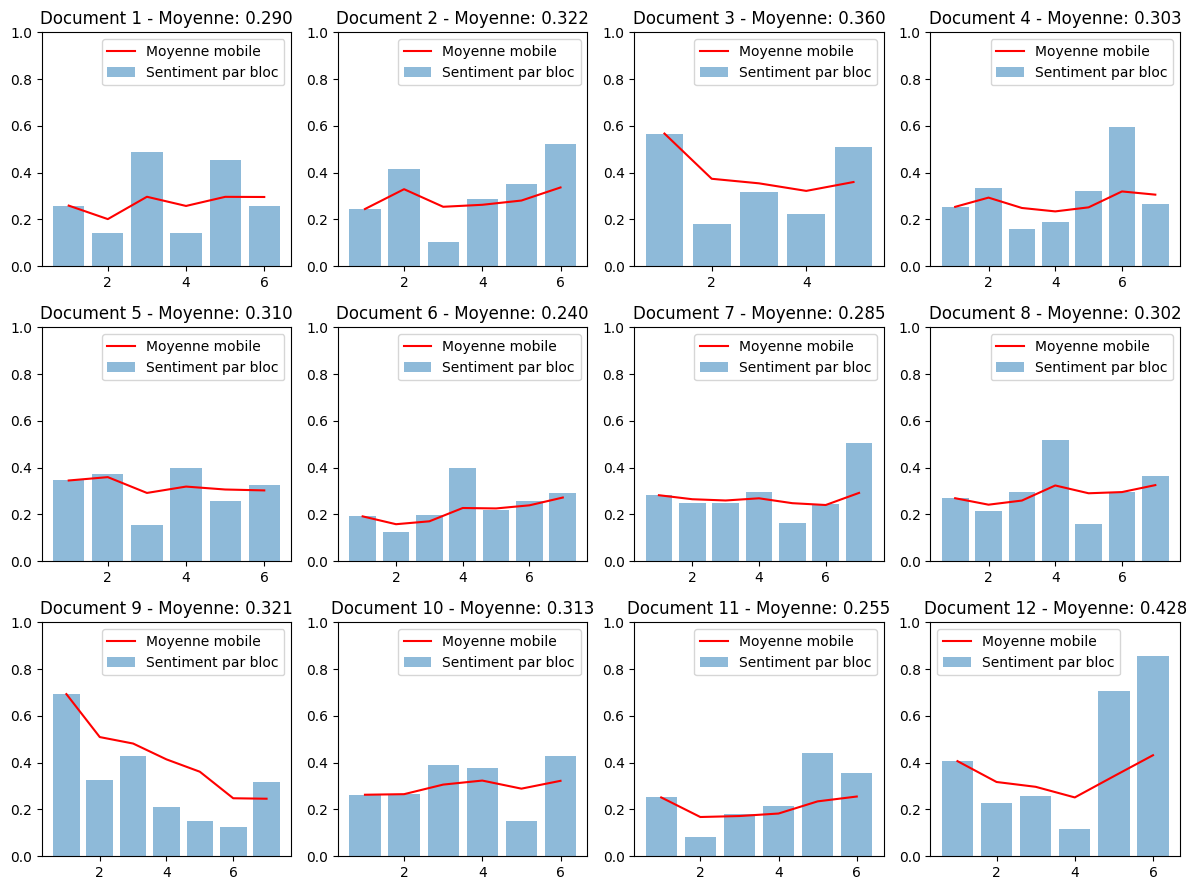

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec

# Initialisation des paramètres pour les graphiques
plt.rcParams["figure.figsize"] = [12, 9]

# Taille de la fenêtre de moyenne mobile
ma_window_size = 5

# Initialisation des variables pour les moyennes globales
total_sentiment_sum = 0
total_sentiment_count = 0

# Création de la grille pour visualiser tous les documents
num_documents = len(corpus_sents)
nx_grid = int(np.sqrt(num_documents))
ny_grid = int(np.ceil(num_documents / nx_grid))

fig = plt.figure()
grid_layout = GridSpec(nx_grid, ny_grid)

# Visualisation des sentiments document par document
for i, document_sentiments in enumerate(corpus_sents):
    # Calcul des moyennes pour chaque document
    document_mean = np.mean(document_sentiments)

    # Calcul de la moyenne mobile (smoothed view)
    mov_avg = pd.Series(document_sentiments).rolling(ma_window_size, min_periods=1).mean().to_list()

    # Préparation des indices pour les blocs
    x_range = list(range(1, len(document_sentiments) + 1))

    # Ajout d'un subplot pour chaque document
    ax = fig.add_subplot(grid_layout[i])
    ax.bar(x_range, document_sentiments, alpha=0.5, label="Sentiment par bloc")
    ax.plot(x_range, mov_avg, color="red", label="Moyenne mobile")
    # Sentiments normalisés entre 0 et 1
    ax.set_ylim([0, 1])
    ax.set_title(f"Document {i+1} - Moyenne: {document_mean:.3f}")
    ax.legend()

    # Mise à jour des calculs pour le sentiment total
    total_sentiment_sum += sum(document_sentiments)
    total_sentiment_count += len(document_sentiments)

# Ajustement de l'affichage global
grid_layout.tight_layout(fig)

# Calcul et affichage des résultats globaux
sentiment_mean_total = total_sentiment_sum / total_sentiment_count
print(f"Sentiment moyen par document (global) : {sentiment_mean_total:.3f}")

# Affichage du graphique
plt.show()


##commentaire 6.5:

Les résultats de l'analyse des sentiments montrent des variations cohérentes avec les événements et l’atmosphère des chapitres du livre Alice au pays des merveilles. Globalement, les sentiments évoluent entre des moments de perplexité, d'humour absurde, et de tension, ce qui reflète bien le ton absurde et loufoque du récit de Lewis Carroll.

Par exemple, le chapitre 3, qui décrit une course entre Alice et les animaux pour se sécher après la mare de larmes, présente une moyenne de sentiment plus élevée (0.360). Cela s’explique par l’aspect humoristique et léger de cette scène, dominée par des dialogues absurdes et des interactions joyeuses. À l’inverse, le chapitre 6, marqué par la rencontre d’Alice avec le mystérieux Chat de Cheshire, affiche une moyenne de sentiment plus basse (0.240), ce qui reflète l’atmosphère énigmatique et légèrement inquiétante de cet échange.

Le chapitre 12 est également intéressant à observer. En effet, Au début, les sentiments sont relativement positifs, car Alice, bien qu’intriguée, n’est pas encore impliquée directement dans le procès. Elle observe les absurdités des personnages, notamment les interactions comiques entre les témoins et le jury. Cela correspond à des moments d’humour et d’absurdité, typiques du style de Lewis Carroll.
La partie centrale du chapitre marque une baisse du sentiment. Cela correspond au moment où la tension monte : la Reine commence à perdre patience et menace régulièrement de couper des têtes, notamment celle d’Alice, tandis que le procès sombre dans un chaos oppressant. Ces éléments introduisent une atmosphère plus tendue et conflictuelle.
Enfin, le sentiment remonte à la fin lorsque Alice reprend confiance en elle, conteste l’autorité de la Reine, et finit par s’éveiller, réalisant que tout cela n’était qu’un rêve. Cette conclusion apporte une résolution libératrice et un retour à des sentiments plus positifs.

Toutefois, soulignons que bien que le modèle identifie correctement les fluctuations sentimentales majeures, il pourrait mieux cerner l’humour noir et l’absurdité du texte s’il était spécifiquement entraîné sur des données reflétant ce type de narration. En formant un modèle sur des corpus où l’humour absurde, l’ironie, et le comique sont prédominants, on pourrait lui permettre de mieux distinguer ces nuances et d’interpréter les situations absurdes non pas comme négatives, mais comme des moments drôles et positifs.

In [ ]:
import os
import torch
import numpy as np
from transformers import BertTokenizer

# Définir le tokenizer et max_length

model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
max_length = 512

#        Initialise le Dataset pour un document.

#        Arguments :
#        - file_path : chemin vers le fichier texte.
#        - tokenizer : tokeniseur BERT pour découper en tokens.
#        - max_length : taille maximale en tokens par bloc.
# Définir la classe Dataset pour découper un texte en blocs
class CorpusDocumentDataset:
    def __init__(self, file_path, tokenizer, max_length):
        self.tokenizer = tokenizer
        self.max_length = max_length

        # Charger le texte du fichier
        with open(file_path, "r", encoding="utf-8") as f:
            self.text = f.read()

        # Tokeniser le texte complet sans tronquer
        tokens = self.tokenizer.encode_plus(
            self.text, truncation=False, add_special_tokens=False
        )["input_ids"]

        # Découper les tokens en blocs de taille max_length
        n_blocks = (len(tokens) + max_length - 1) // max_length
        self.token_blocks = np.array_split(tokens, n_blocks)

# Nombre de blocs dans le document.
    def __len__(self):
        return len(self.token_blocks)

# Décoder les tokens en texte pour un bloc.
    def __getitem__(self, idx):
        block_tokens = self.token_blocks[idx]
        return self.tokenizer.decode(block_tokens, skip_special_tokens=True)

# Entrée : chemin du document
file_path = "chapters_corrected/chapter_01.txt"

# Initialiser le Dataset
dataset = CorpusDocumentDataset(file_path, tokenizer, max_length)

# Afficher chaque bloc du texte
print(f"Document découpé en {len(dataset)} blocs de {max_length} tokens maximum :\n")
for i, block in enumerate(dataset):
    print(f"Bloc {i + 1} :")
    print(block)
    print("-" * 80)


Token indices sequence length is longer than the specified maximum sequence length for this model (2713 > 512). Running this sequence through the model will result in indexing errors


Document découpé en 6 blocs de 512 tokens maximum :

Bloc 1 :
down the rabbit - hole alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do : once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, “ and what is the use of a book, ” thought alice “ without pictures or conversations? ” so she was considering in her own mind ( as well as she could, for the hot day made her feel very sleepy and stupid ), whether the pleasure of making a daisy - chain would be worth the trouble of getting up and picking the daisies, when suddenly a white rabbit with pink eyes ran close by her. there was nothing so _ very _ remarkable in that ; nor did alice think it so _ very _ much out of the way to hear the rabbit say to itself, “ oh dear! oh dear! i shall be late! ” ( when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite

In [ ]:
#------------------------------------------------------------------------------------